# Data importing and Data Cleaning

Data Importing : Importing the relevant libraries, could import basic libraries using one command using the pyforest library

In [1]:
import pyforest
import warnings
warnings.filterwarnings("ignore")

Data importing : Importing the raw bikeride csv files

In [2]:
data=pd.read_excel('/Users/soumyadasgupta/Documents/git_projects/Bike-Sharing-System/Data/tfl-daily-cycle-hires.xlsx',engine="openpyxl")

# Checking the head of the data
data.head()

<IPython.core.display.Javascript object>

Day  Number of Bicycle Hires  Unnamed: 2      Month  \
0 2010-07-30                     6897         NaN 2010-07-01   
1 2010-07-31                     5564         NaN 2010-08-01   
2 2010-08-01                     4303         NaN 2010-09-01   
3 2010-08-02                     6642         NaN 2010-10-01   
4 2010-08-03                     7966         NaN 2010-11-01   

   Number of Bicycle Hires.1  Unnamed: 5  Year Number of Bicycle Hires.2  \
0                    12461.0         NaN  2010                   2180813   
1                   341203.0         NaN  2011                   7142449   
2                   540859.0         NaN  2012                   9519283   
3                   544412.0         NaN  2013                   8045459   
4                   456304.0         NaN  2014                  10023897   

   Unnamed: 8    Month.1  Average Hire Time (mins)  Unnamed: 11  Unnamed: 12  \
0         NaN 2010-07-01                 17.232566          NaN          NaN   
1         NaN 2010-08-01                 16.551880          NaN          NaN   
2         NaN 2010-09-01                 15.219079          NaN          NaN   
3         NaN 2010-10-01                 15.204481          NaN          NaN   
4         NaN 2010-11-01                 13.776083          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN

Data importing : Importing the raw power generation csv files

In [3]:
power_generation=pd.read_excel('/Users/soumyadasgupta/Documents/git_projects/Bike-Sharing-System/Data/power_generation.xlsx',engine="openpyxl")
power_generation['SD']=pd.to_datetime(power_generation['SD'], format='%Y-%m-%d')
power_generation.rename(columns={'SD':'Date'},inplace=True)

power_generation.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Date     Gas    Coal  Nuclear  Hydro  Net Pumped  Wind  OCGT  Oil  \
0 2010-07-30  431920  184603   122467   4417       -4582  4841    15    0   
1 2010-07-31  406077  111091   121983   4604         726  7013     0    0   
2 2010-08-01  393442  109041   126746   4839       -6091  4264     0    0   
3 2010-08-02  429981  190693   122512   3638       -2698   866     0    0   
4 2010-08-03  433955  182201   125603   3594       -4137  5358     4    0   

   Biomass  French Int  Dutch Int  NI Int  Eire Int  Nemo Int  Net Supply  
0        0       44898          0   -7411         0         0      781168  
1        0       46443          0   -4932         0         0      693004  
2        0       47760          0   -5775         0         0      674225  
3        0       45391          0   -7895         0         0      782488  
4        0       45788          0   -7593         0         0      784771

Data importing : Importing the weather data for the dates in the data using an API from the website : https://www.worldweatheronline.com/. 
This API key is purchased for personal use. This request shouldnt be run as it charges the user per instance of weather calls.

In [4]:
# from wwo_hist import retrieve_hist_data
# frequency=24
# start_date = '30-JUL-2010'
# end_date = '28-FEB-2021'
# api_key = '3bca1e937a********2211503' # The API key has been coded into asterisk for the sake of privacy.
# location_list = ['London']

# hist_weather_data = retrieve_hist_data(api_key,location_list,start_date,end_date,frequency,
#                                 location_label = False,export_csv = True,store_df = True)

Data importing : The weather data is saved as a .csv file in the directory as 'London.csv'. 

Data cleaning : The data has been imported and cleaned

In [5]:
weatherdata=pd.read_csv('/Users/soumyadasgupta/Documents/git_projects/Bike-Sharing-System/Data/London_weather.csv')
weatherdata['date_time']=pd.to_datetime(weatherdata['date_time'], format='%Y-%m-%d %H:%M:%S')
weatherdata['Dates']=weatherdata['date_time']
weatherdata['Dates'] = pd.to_datetime(weatherdata['Dates'])
weatherdata.rename(columns={'date_time':'Date'},inplace=True)

# Checking the head of the dataframe
weatherdata.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Date  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0 2010-07-01        24        12           0.0     15.0        5   
1 2010-07-02        25        18           0.0     15.8        5   
2 2010-07-03        26        15           0.0     16.7        6   
3 2010-07-04        23        12           0.0     15.8        5   
4 2010-07-05        22        14           0.0     15.0        4   

   moon_illumination     moonrise   moonset   sunrise  ... cloudcover  \
0                 64     11:21 PM  10:08 AM  04:47 AM  ...         44   
1                 57     11:35 PM  11:16 AM  04:48 AM  ...         53   
2                 50     11:49 PM  12:23 PM  04:49 AM  ...         27   
3                 42  No moonrise  01:32 PM  04:49 AM  ...         28   
4                 35     12:05 AM  02:43 PM  04:50 AM  ...         66   

   humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0        67       0.0      1014     24           9            201   
1        64       0.1      1012     25          10            209   
2        61       0.0      1019     26          10            287   
3        62       0.0      1020     23          10            240   
4        66       0.0      1021     22           9            287   

   windspeedKmph  location      Dates  
0             12    London 2010-07-01  
1             13    London 2010-07-02  
2              8    London 2010-07-03  
3             15    London 2010-07-04  
4             11    London 2010-07-05  

[5 rows x 26 columns]

Data importing : Importing the Holidays data

In [6]:
holidays=pd.read_excel('/Users/soumyadasgupta/Documents/git_projects/Bike-Sharing-System/Data/uk_holidays.xlsx',engine="openpyxl")
# Checking the head of the dataframe 
holidays.head()

<IPython.core.display.Javascript object>

Date  Non_work_day
0 2010-01-01             1
1 2010-04-02             1
2 2010-04-05             1
3 2010-05-03             1
4 2010-05-31             1

Data cleaning : Filtering the dataframe on the features required for the analysis.

In [7]:
data=data[['Day', 'Number of Bicycle Hires', 'Month','Number of Bicycle Hires.1', 'Year',
       'Number of Bicycle Hires.2', 'Month.1','Average Hire Time (mins)']]
# Checking the head of the dataframe
data.head()

Day  Number of Bicycle Hires      Month  Number of Bicycle Hires.1  \
0 2010-07-30                     6897 2010-07-01                    12461.0   
1 2010-07-31                     5564 2010-08-01                   341203.0   
2 2010-08-01                     4303 2010-09-01                   540859.0   
3 2010-08-02                     6642 2010-10-01                   544412.0   
4 2010-08-03                     7966 2010-11-01                   456304.0   

   Year Number of Bicycle Hires.2    Month.1  Average Hire Time (mins)  
0  2010                   2180813 2010-07-01                 17.232566  
1  2011                   7142449 2010-08-01                 16.551880  
2  2012                   9519283 2010-09-01                 15.219079  
3  2013                   8045459 2010-10-01                 15.204481  
4  2014                  10023897 2010-11-01                 13.776083

Data cleaning : Cleaning and filtered data based on daily,yearly,monthly basis and other criterions

In [8]:
data_daily=data[['Day','Number of Bicycle Hires']]
data_monthly_hire_count=data[['Month','Number of Bicycle Hires.1']].head(128)
data_yearly_hires=data[['Year','Number of Bicycle Hires.2']].head(10)
data_average_time=data[['Month.1','Average Hire Time (mins)']].head(128)
percent_hires=data[['Year','Number of Bicycle Hires.2']][13:128]

Data cleaning : Renaming the columns

In [9]:
data_daily.rename(columns={'Day':'Date','Number of Bicycle Hires':'Number_of_Bicycle_Hires'},inplace=True)
data_yearly_hires.rename(columns={'Number of Bicycle Hires.2':'Bike_Hires_Yearly'},inplace=True)
data_average_time.rename(columns={'Month.1':'Month','Average Hire Time (mins)':'Average_Hire_Time_Average'},inplace=True)
data_monthly_hire_count.rename(columns={'Number of Bicycle Hires.1':'Bike_Hires_Monthly'},inplace=True)
percent_hires.rename(columns={'Number of Bicycle Hires.2':'Bike_Hires_Percent'},inplace=True)

Checking the data types of the features :

In [10]:
data_yearly_hires.dtypes

Year                 object
Bike_Hires_Yearly    object
dtype: object

In [11]:
data_average_time.dtypes

Month                        datetime64[ns]
Average_Hire_Time_Average           float64
dtype: object

In [12]:
data_monthly_hire_count.dtypes

Month                 datetime64[ns]
Bike_Hires_Monthly           float64
dtype: object

In [13]:
percent_hires.dtypes

Year                  object
Bike_Hires_Percent    object
dtype: object

Data Cleaning : Cleaning the data for Daily Bike Ride Data

In [14]:
data_daily=data_daily.merge(holidays, on='Date', how='outer')
data_daily=data_daily[:3867]

In [15]:
# data_daily['Workday'] = data_daily['Workday'].replace(np.nan, 0)
data_daily['Non_work_day'] = data_daily['Non_work_day'].replace(np.nan, 0)

<IPython.core.display.Javascript object>

In [16]:
data_daily.head()

Date  Number_of_Bicycle_Hires  Non_work_day
0 2010-07-30                   6897.0           0.0
1 2010-07-31                   5564.0           0.0
2 2010-08-01                   4303.0           0.0
3 2010-08-02                   6642.0           0.0
4 2010-08-03                   7966.0           0.0

In [17]:
data_daily['DAY'] = data_daily['Date'].dt.day_name()
data_daily['DAY_NUMBER']=data_daily['Date'].dt.dayofweek

data_daily.loc[data_daily.DAY == 'Sunday', 'WEEKDAY_WEEKEND'] = 'Weekend'
data_daily.loc[data_daily.DAY == 'Saturday', 'WEEKDAY_WEEKEND'] = 'Weekend'
data_daily.loc[data_daily.DAY == 'Monday', 'WEEKDAY_WEEKEND'] = 'Weekday'
data_daily.loc[data_daily.DAY == 'Tuesday', 'WEEKDAY_WEEKEND'] = 'Weekday'
data_daily.loc[data_daily.DAY == 'Wednesday', 'WEEKDAY_WEEKEND'] = 'Weekday'
data_daily.loc[data_daily.DAY == 'Thursday', 'WEEKDAY_WEEKEND'] = 'Weekday'
data_daily.loc[data_daily.DAY == 'Friday', 'WEEKDAY_WEEKEND'] = 'Weekday'


data_daily['ST_DAY']=np.nan
data_daily['ST_MONTH']=np.nan
data_daily['Month']=np.nan
data_daily['ST_YEAR']=np.nan
data_daily['Wkday_Wend']=np.nan

data_daily['ST_DAY'] = data_daily['Date'].dt.day
data_daily['ST_MONTH'] = data_daily['Date'].dt.month
data_daily['ST_YEAR'] = data_daily['Date'].dt.year
data_daily['DAY'] = data_daily['Date'].dt.day_name()

only_mondays=data_daily[data_daily['DAY']=='Monday']
only_tuesdays=data_daily[data_daily['DAY']=='Tuesday']
only_wednesdays=data_daily[data_daily['DAY']=='Wednesday']
only_thursdays=data_daily[data_daily['DAY']=='Thursday']
only_fridays=data_daily[data_daily['DAY']=='Friday']
only_saturdays=data_daily[data_daily['DAY']=='Saturday']
only_sundays=data_daily[data_daily['DAY']=='Sunday']

data_daily.loc[data_daily.ST_MONTH == 1, 'Month'] = 'January'
data_daily.loc[data_daily.ST_MONTH == 2, 'Month'] = 'February'
data_daily.loc[data_daily.ST_MONTH == 3, 'Month'] = 'March'
data_daily.loc[data_daily.ST_MONTH == 4, 'Month'] = 'April'
data_daily.loc[data_daily.ST_MONTH == 5, 'Month'] = 'May'
data_daily.loc[data_daily.ST_MONTH == 6, 'Month'] = 'June'
data_daily.loc[data_daily.ST_MONTH == 7, 'Month'] = 'July'
data_daily.loc[data_daily.ST_MONTH == 8, 'Month'] = 'August'
data_daily.loc[data_daily.ST_MONTH == 9, 'Month'] = 'September'
data_daily.loc[data_daily.ST_MONTH == 10, 'Month'] = 'October'
data_daily.loc[data_daily.ST_MONTH == 11, 'Month'] = 'November'
data_daily.loc[data_daily.ST_MONTH == 12, 'Month'] = 'December'

data_daily.loc[data_daily.WEEKDAY_WEEKEND == 'Weekday', 'Wkday_Wend'] = 1
data_daily.loc[data_daily.WEEKDAY_WEEKEND == 'Weekend', 'Wkday_Wend'] = 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data Cleaning : Filtering daily data based on features needed for the analysis.

In [18]:
data_daily=data_daily[['Date','DAY','DAY_NUMBER','WEEKDAY_WEEKEND','ST_DAY','ST_MONTH','Month','ST_YEAR',
        'Non_work_day','Wkday_Wend','Number_of_Bicycle_Hires']]
data_daily.head()

Date       DAY  DAY_NUMBER WEEKDAY_WEEKEND  ST_DAY  ST_MONTH   Month  \
0 2010-07-30    Friday           4         Weekday      30         7    July   
1 2010-07-31  Saturday           5         Weekend      31         7    July   
2 2010-08-01    Sunday           6         Weekend       1         8  August   
3 2010-08-02    Monday           0         Weekday       2         8  August   
4 2010-08-03   Tuesday           1         Weekday       3         8  August   

   ST_YEAR  Non_work_day  Wkday_Wend  Number_of_Bicycle_Hires  
0     2010           0.0         1.0                   6897.0  
1     2010           0.0         0.0                   5564.0  
2     2010           0.0         0.0                   4303.0  
3     2010           0.0         1.0                   6642.0  
4     2010           0.0         1.0                   7966.0

# EXPLORATORY DATA ANALYSIS (EDA) :

Analysis : Mean rides over the years

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

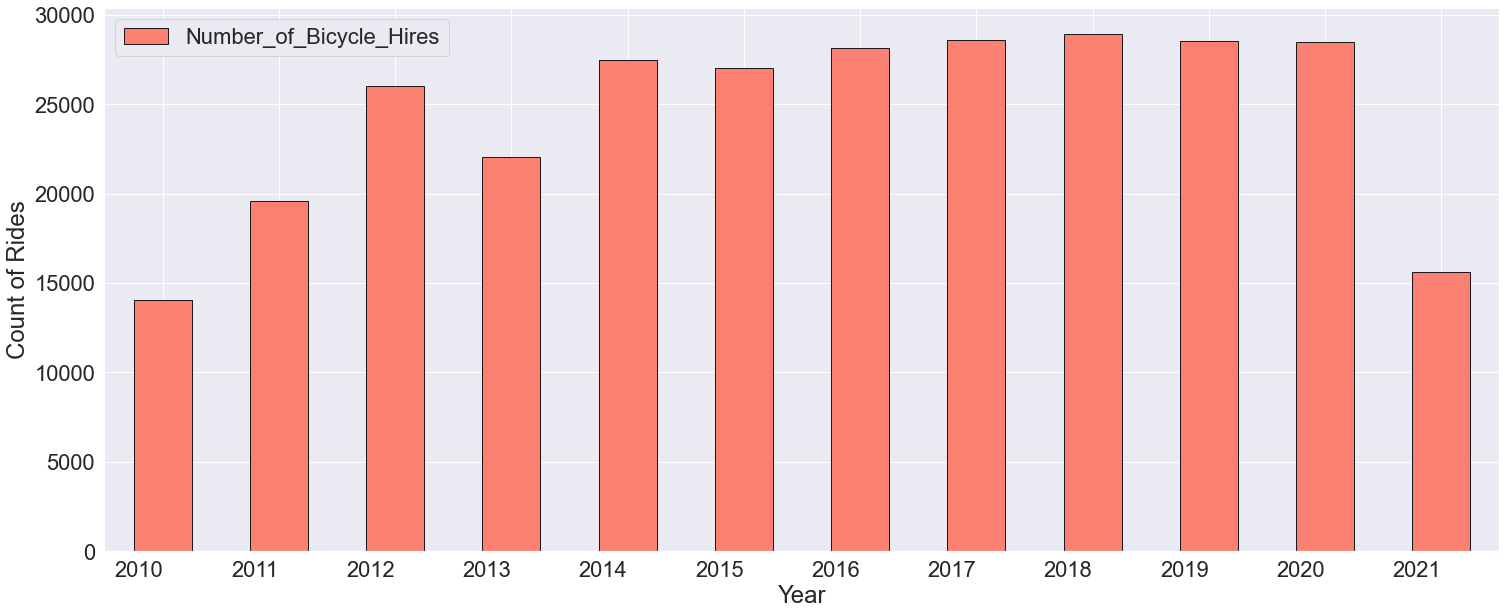

In [19]:
sns.set(font_scale = 2);
yearly_analysis=pd.DataFrame(data_daily.groupby('ST_YEAR').mean()['Number_of_Bicycle_Hires'])
yearly_analysis.plot(kind='bar',color='salmon',edgecolor='k',figsize=(25,10))
plt.xlabel('Year');
plt.ylabel('Count of Rides');
plt.xticks(rotation=0, ha='right');

Analysis: Mean rides over the months

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

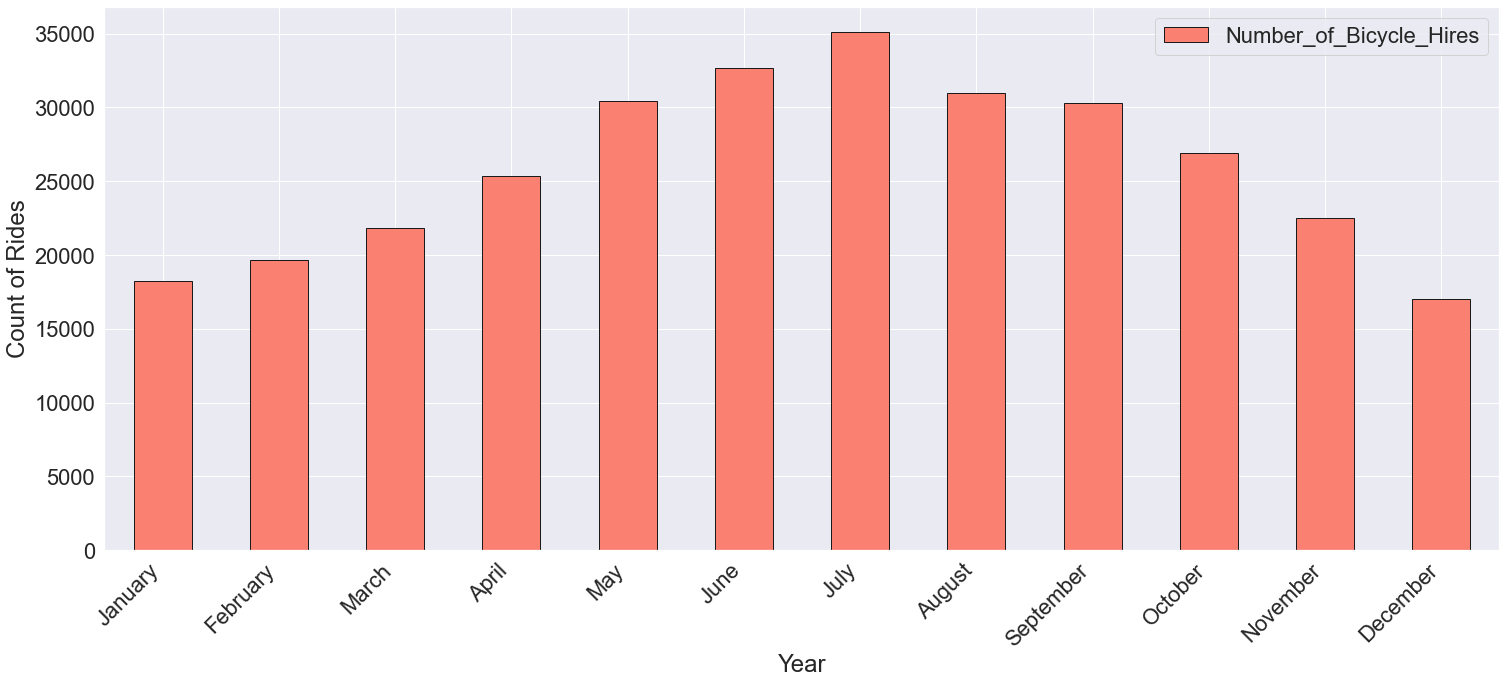

In [20]:
cats=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(font_scale = 2);
monthly_analysis=pd.DataFrame(data_daily.groupby('Month').mean().reindex(cats)['Number_of_Bicycle_Hires'])
monthly_analysis.plot(kind='bar',color='salmon',edgecolor='k',figsize=(25,10))
plt.xlabel('Year');
plt.ylabel('Count of Rides');
plt.xticks(rotation=45, ha='right');

Analysis: Mean rides based on Weekdays and Weekends

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

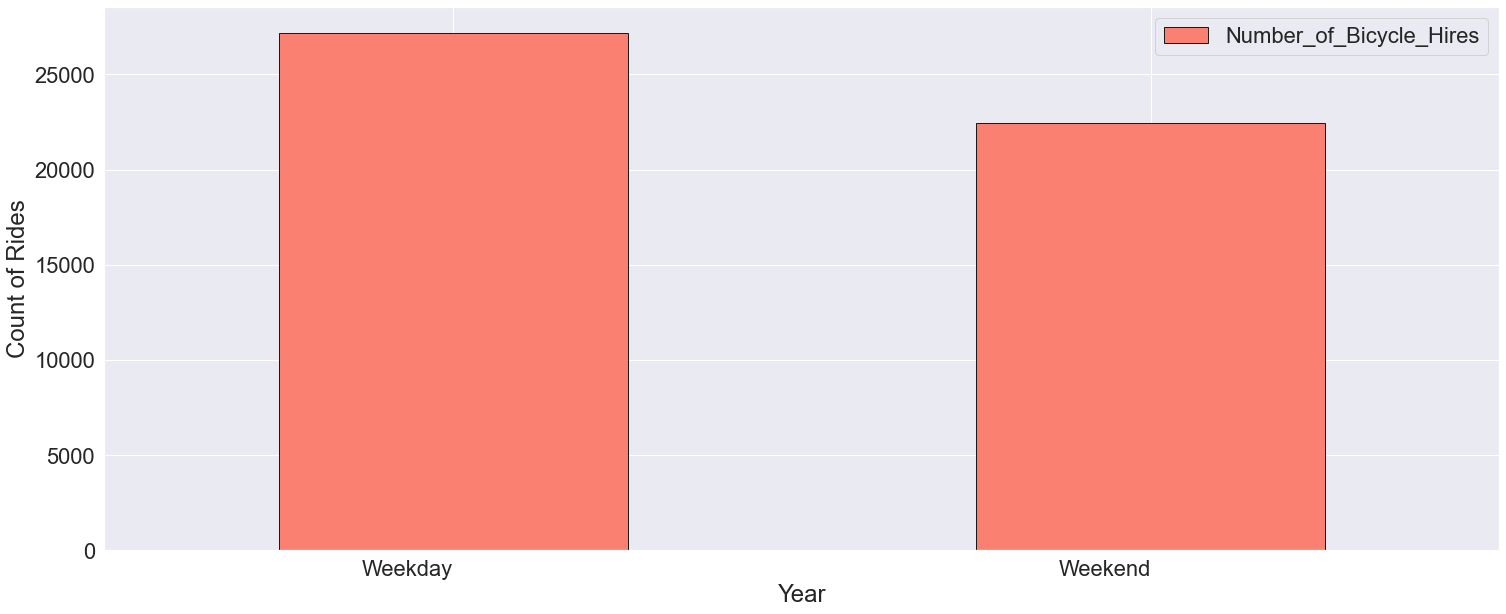

In [21]:
sns.set(font_scale = 2);
wkday_wkend_analysis=pd.DataFrame(data_daily.groupby('WEEKDAY_WEEKEND').mean()['Number_of_Bicycle_Hires'])
wkday_wkend_analysis.plot(kind='bar',color='salmon',edgecolor='k',figsize=(25,10))
plt.xlabel('Year');
plt.ylabel('Count of Rides');
plt.xticks(rotation=0, ha='right');

Analysis: Mean rides over the day of the week

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

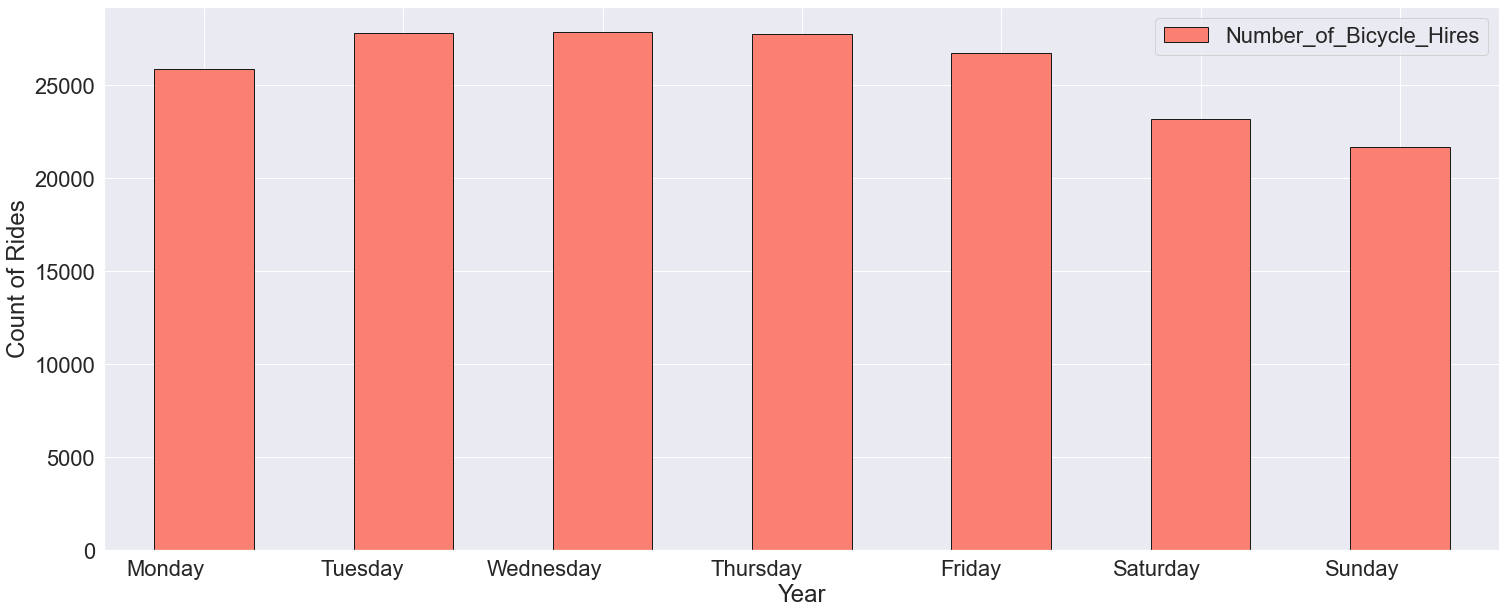

In [22]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.set(font_scale = 2);
daily_analysis=pd.DataFrame(data_daily.groupby('DAY').mean().reindex(cats)['Number_of_Bicycle_Hires'])
daily_analysis.plot(kind='bar',color='salmon',edgecolor='k',figsize=(25,10))
plt.xlabel('Year');
plt.ylabel('Count of Rides');
plt.xticks(rotation=0, ha='right');

Analysis: Bike rides over the month compared on the basis of Weekdays and Weekends

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

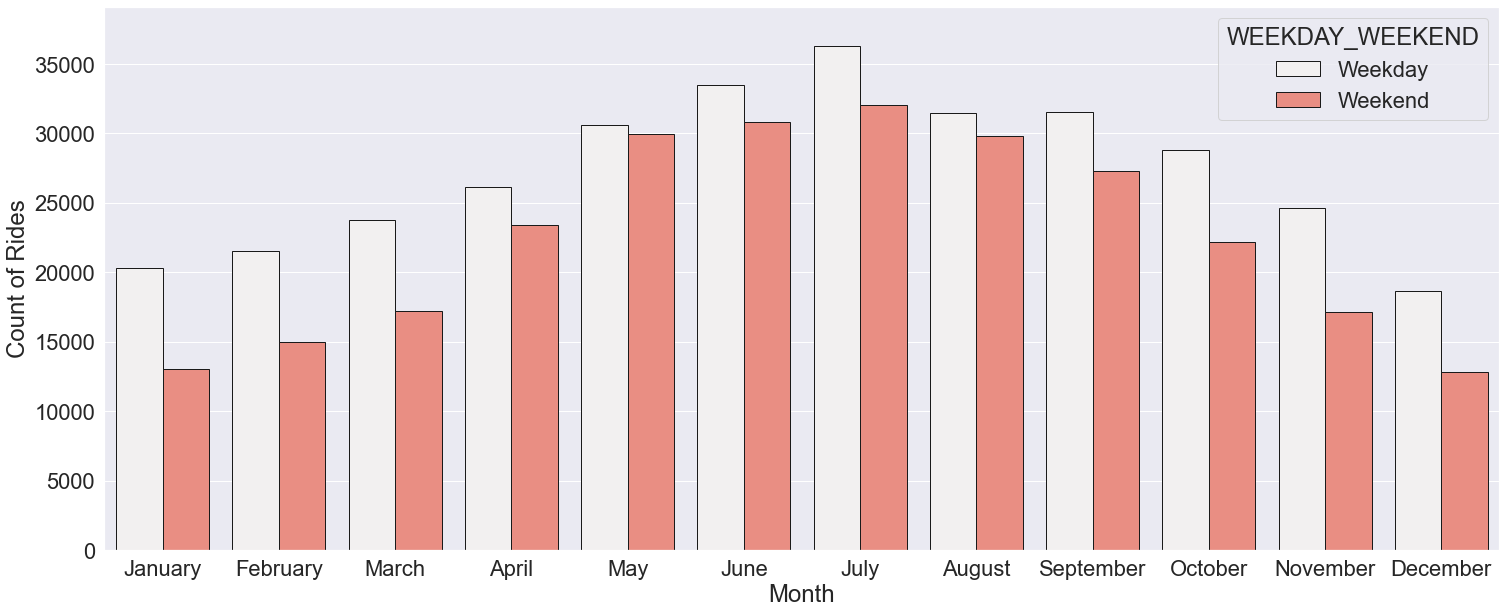

In [23]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
months=['January','February','March','April','May','June','July','August','September','October',
      'November','December']
sns.barplot(x="Month", y="Number_of_Bicycle_Hires",hue="WEEKDAY_WEEKEND", data=data_daily,color='salmon',
           edgecolor='k',errwidth=0,order=months);
plt.xlabel('Month');
plt.ylabel('Count of Rides');

Analysis : Distribution of Rides

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

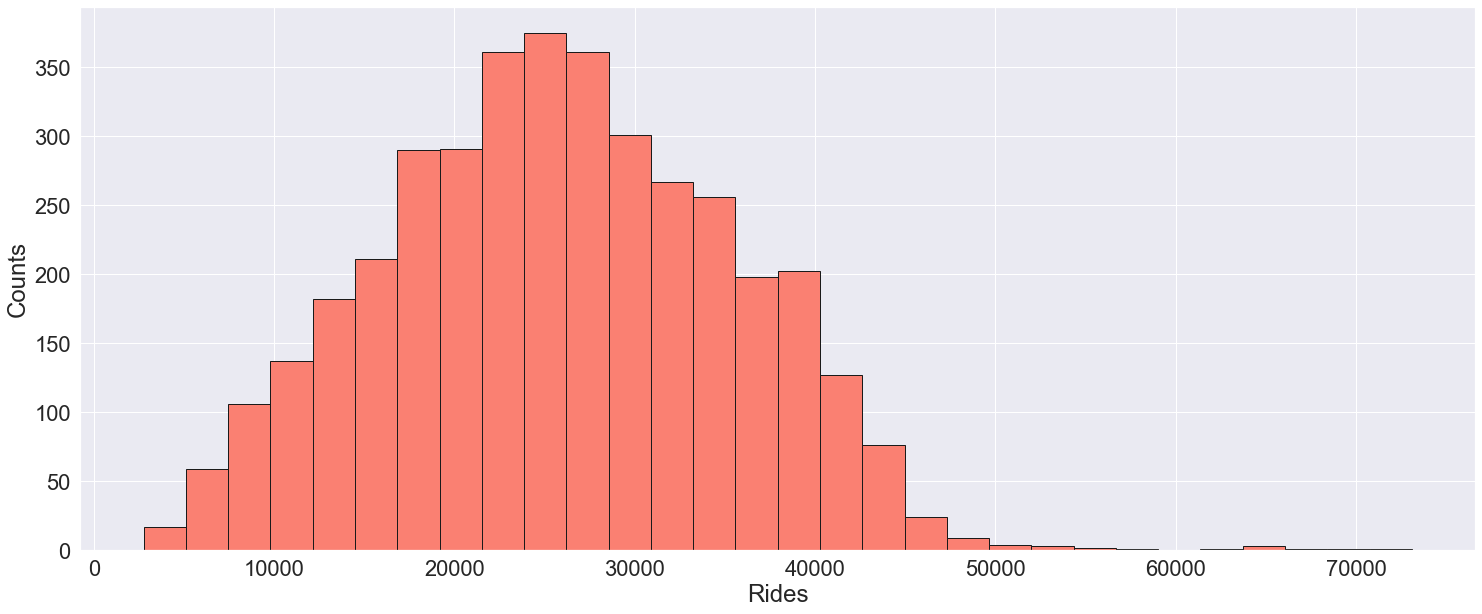

In [24]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.hist(data_daily['Number_of_Bicycle_Hires'], bins = 30, color='salmon',edgecolor='k');
plt.xlabel('Rides')
plt.ylabel('Counts');

Analysis: Bike rides over the week compared on the basis of the months of the year

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

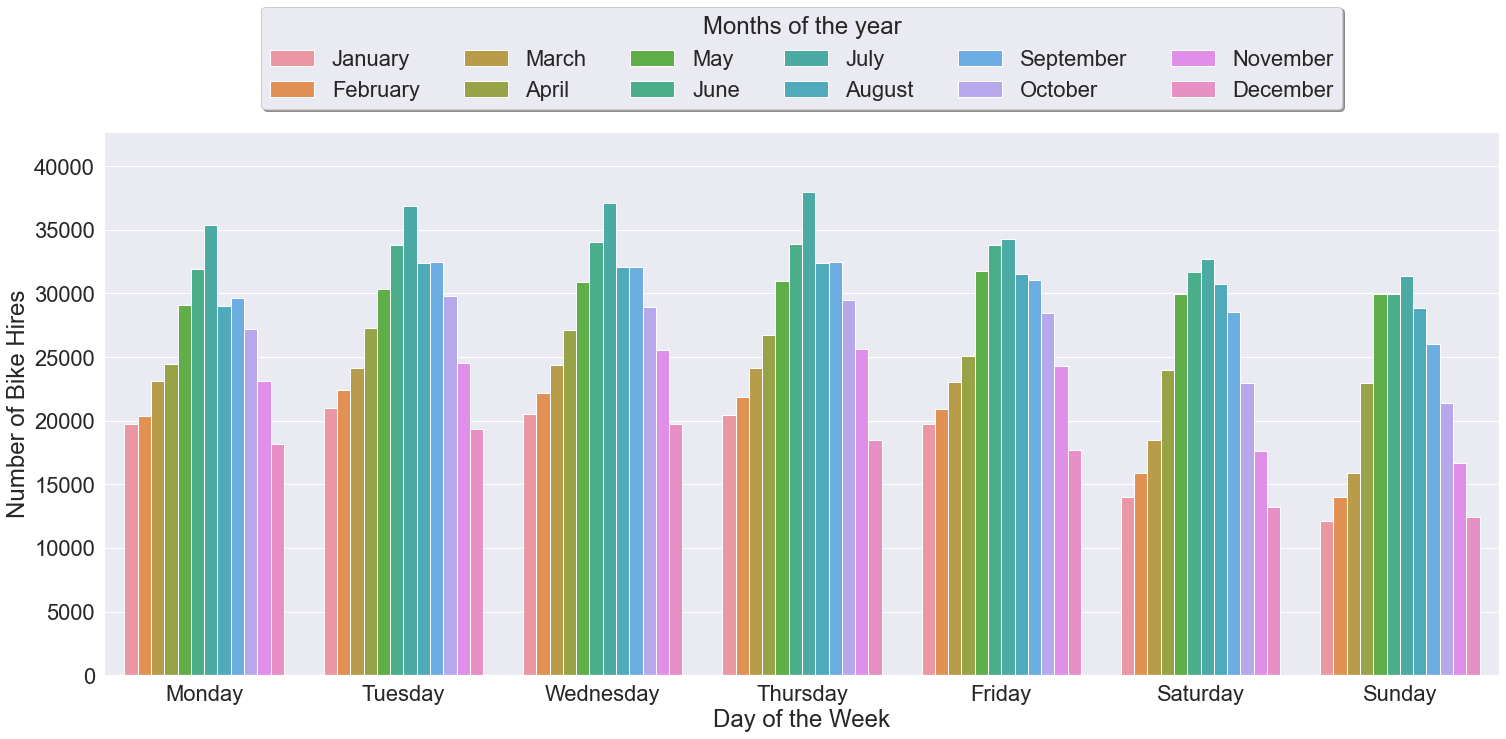

In [25]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months=['January','February','March','April','May','June','July','August','September','October',
      'November','December']
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x="DAY", y="Number_of_Bicycle_Hires",hue='Month', data=data_daily, capsize=.2,
            errwidth=0,order=days,hue_order=months)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Hires');


plt.legend(title='Months of the year',loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=6,
           fancybox=True, shadow=True);

# Machine Learning

Machine Learning has been used in the next section to predict the number of bike rides. Data-Sets used for the prediction are 

    1. On TFL data
    2. On TFL data merged with weather data and holiday data
    3. On TFL data merged with Power Generation data and holiday data
    4. On TFL data merged with weather data, Power Generation data and holiday data

As this analysis deals with a regression problem, 5 different machine learning algorithms have been used for this analysis

    1. Linear Regression
    2. Decision Tree Regressor
    3. Random Forest Regressor
    4. ADA-Boost Regressor
    5. Neural Network
    
Finally ARIMA and SEASONAL ARIMA (SARIMA) has been used for the prediction of Bike Rides.

The evaluation metrics of the model are enumerated at the end. The metrics considered for this analysis are Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and Mean Absolute Percentage Error. The reason for choosing these is because they are industry standard metrics used to evaluate performance of models.
Finally a scatter plot has also been shown as a metric for each machine learning model which lets the viewer identify the efficacy of the model. The closeness of the scatter between the test value vs the predicted value and y=x line shows how efficient the model is.

# 1. Machine Learning with only 'TFL' data

One Hot Encoding for Time and Weekday/Weekend Feature 

In [26]:
all_data = pd.concat([data_daily, pd.get_dummies(data_daily.ST_YEAR, prefix = 'Time')],axis = 1)

# Checking the head of the dataframe
all_data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Date       DAY  DAY_NUMBER WEEKDAY_WEEKEND  ST_DAY  ST_MONTH   Month  \
0 2010-07-30    Friday           4         Weekday      30         7    July   
1 2010-07-31  Saturday           5         Weekend      31         7    July   
2 2010-08-01    Sunday           6         Weekend       1         8  August   
3 2010-08-02    Monday           0         Weekday       2         8  August   
4 2010-08-03   Tuesday           1         Weekday       3         8  August   

   ST_YEAR  Non_work_day  Wkday_Wend  ...  Time_2012  Time_2013  Time_2014  \
0     2010           0.0         1.0  ...          0          0          0   
1     2010           0.0         0.0  ...          0          0          0   
2     2010           0.0         0.0  ...          0          0          0   
3     2010           0.0         1.0  ...          0          0          0   
4     2010           0.0         1.0  ...          0          0          0   

   Time_2015  Time_2016  Time_2017  Time_2018  Time_2019  Time_2020  Time_2021  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 23 columns]

In [27]:
all_data.columns

Index(['Date', 'DAY', 'DAY_NUMBER', 'WEEKDAY_WEEKEND', 'ST_DAY', 'ST_MONTH',
       'Month', 'ST_YEAR', 'Non_work_day', 'Wkday_Wend',
       'Number_of_Bicycle_Hires', 'Time_2010', 'Time_2011', 'Time_2012',
       'Time_2013', 'Time_2014', 'Time_2015', 'Time_2016', 'Time_2017',
       'Time_2018', 'Time_2019', 'Time_2020', 'Time_2021'],
      dtype='object')

# Train Test Split

The data has been split into a training set and a testing set. The model will be trained on the training set and then the test set will be used to evaluate the model.

In [28]:
X = all_data[['ST_DAY', 'ST_MONTH','Time_2010', 'Time_2011',
       'Time_2012', 'Time_2013', 'Time_2014', 'Time_2015', 'Time_2016',
       'Time_2017', 'Time_2018', 'Time_2019', 'Time_2020', 'Time_2021',
       'Wkday_Wend']]
y = all_data['Number_of_Bicycle_Hires']

Linear Regression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 6448.552431100257
MSE: 66507327.454023644


<IPython.core.display.Javascript object>

RMSE: 8155.202477806645


<IPython.core.display.Javascript object>

MAPE: 31.57510671903528


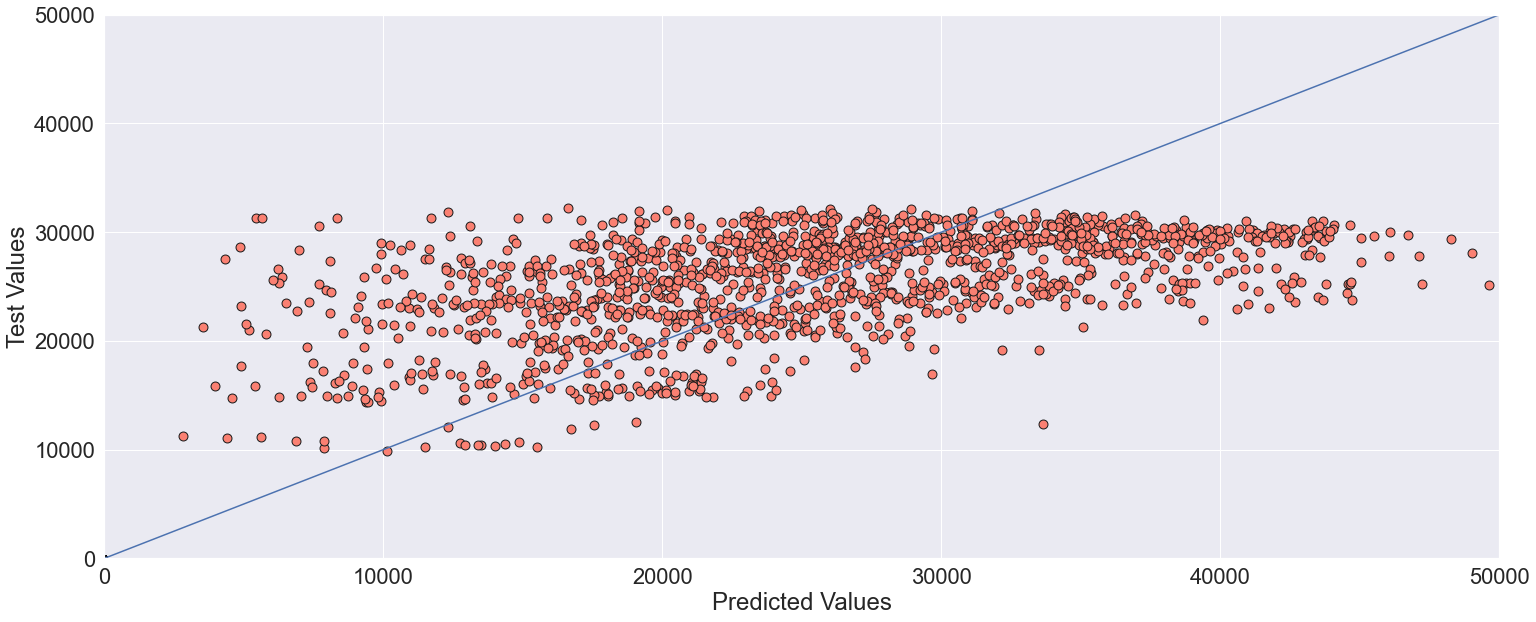

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )
plt.xlim(0,50000)
plt.ylim(0,50000);

# Metrics for Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)


Decision Tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 4069.329561329943
MSE: 30027910.148318723


<IPython.core.display.Javascript object>

RMSE: 5479.772819042659


<IPython.core.display.Javascript object>

MAPE: 21.21644582439306


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

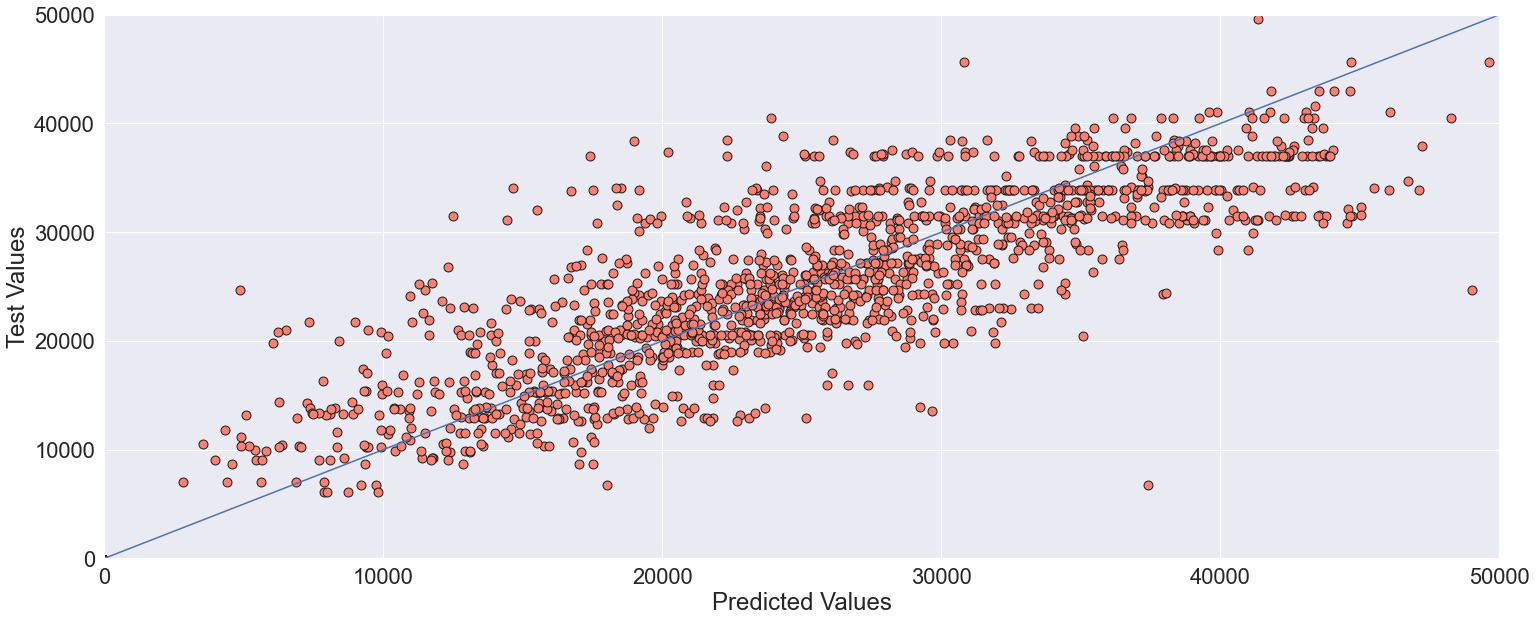

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_


# Training with best parameters
# from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)


plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )

plt.xlim(0,50000)
plt.ylim(0,50000);


Random Forest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 4000.821519814423
MSE: 29681972.944895517


<IPython.core.display.Javascript object>

RMSE: 5448.116458455666


<IPython.core.display.Javascript object>

MAPE: 21.09387952802081


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

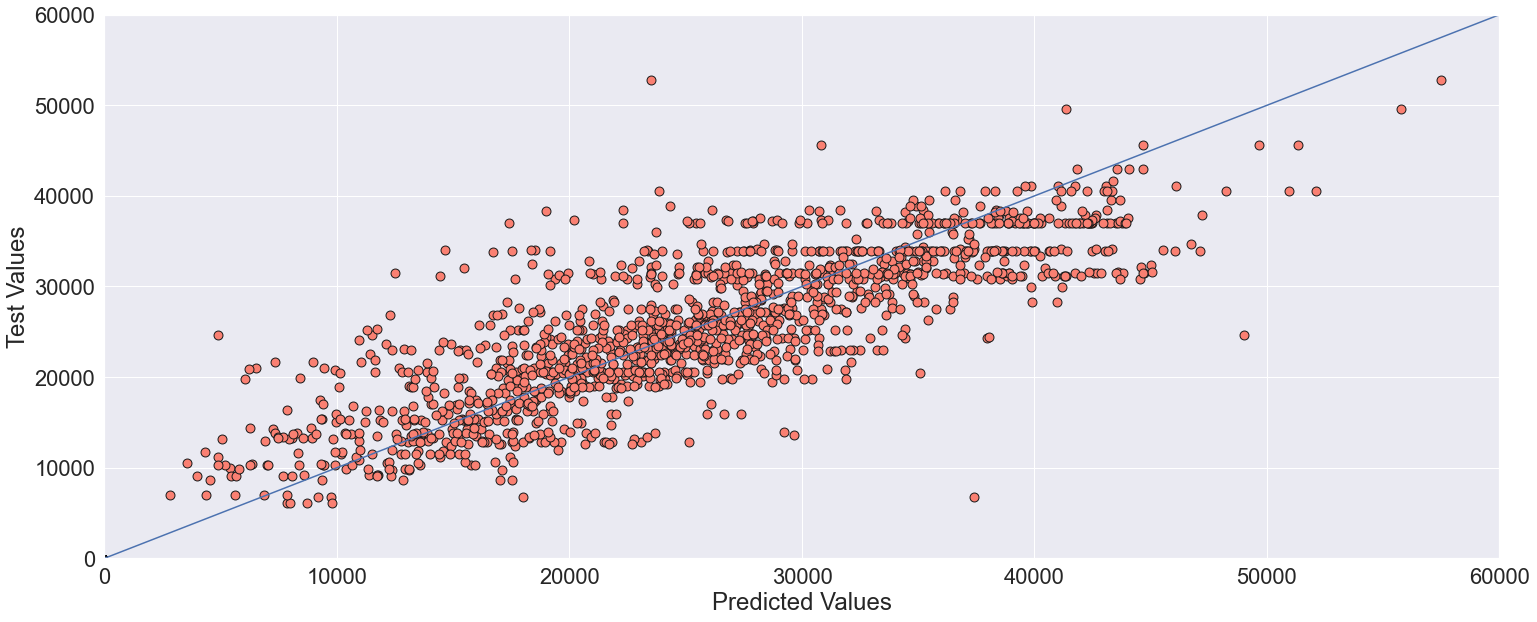

In [31]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),
             'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],
                           min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);



ADA Boost Regressor

<IPython.core.display.Javascript object>

MAE: 4045.366969967796
MSE: 27243208.142824523


<IPython.core.display.Javascript object>

RMSE: 5219.50267198174


<IPython.core.display.Javascript object>

MAPE: 20.20873845089842


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

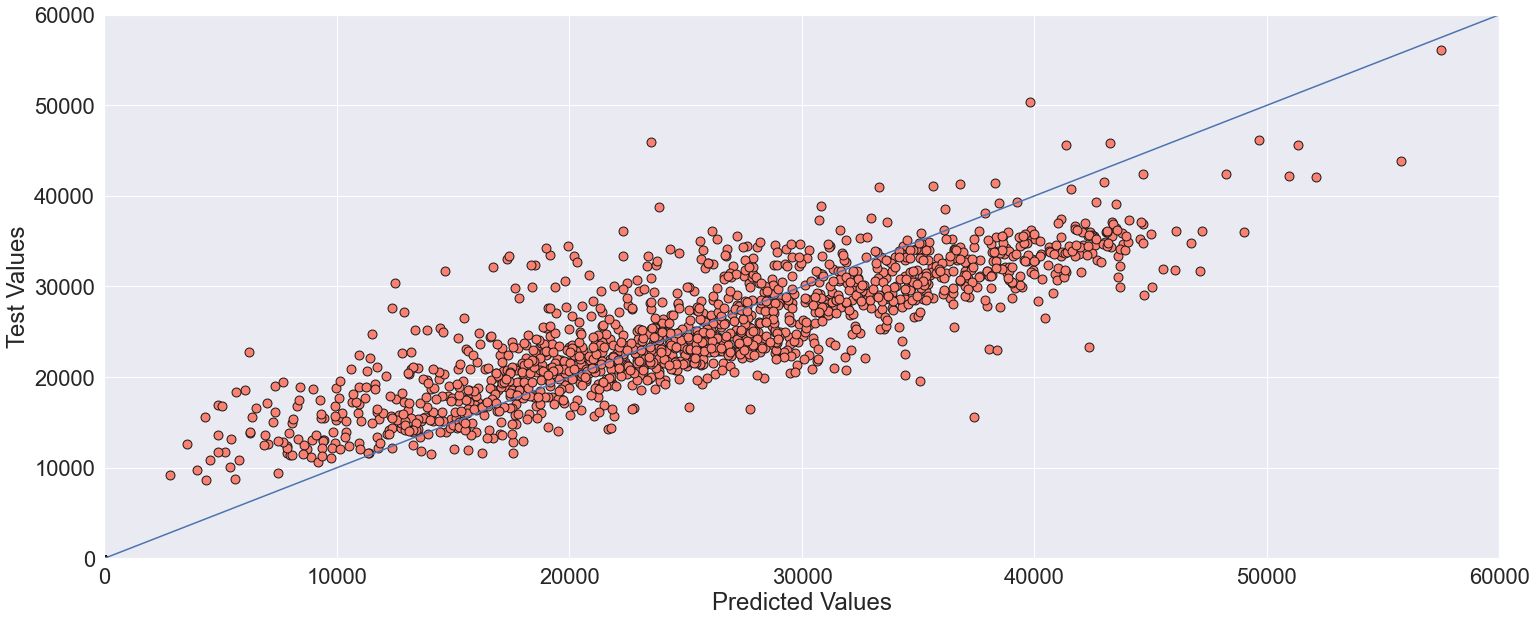

In [32]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test);

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  y_pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)


plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,y_pred,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);

Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [34]:
X = all_data[['ST_DAY', 'ST_MONTH','Time_2010', 'Time_2011',
       'Time_2012', 'Time_2013', 'Time_2014', 'Time_2015', 'Time_2016',
       'Time_2017', 'Time_2018', 'Time_2019', 'Time_2020', 'Time_2021',
       'Wkday_Wend']]
y = all_data['Number_of_Bicycle_Hires']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

model = Sequential()

model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [35]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_test.values,y_test.values),batch_size=128, verbose=0,epochs=400,callbacks=[early_stop]);

<IPython.core.display.Javascript object>

<AxesSubplot:>

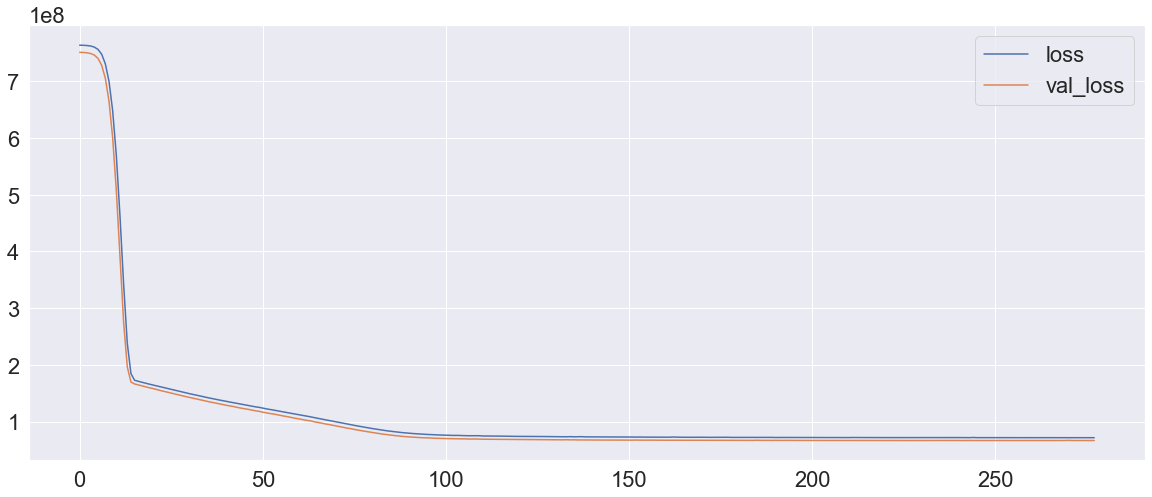

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(20,8))

MAE: 6455.961718371243
MSE: 66590561.43816998


<IPython.core.display.Javascript object>

RMSE: 8160.304004028892


<IPython.core.display.Javascript object>

MAPE: 31.594858679251566


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

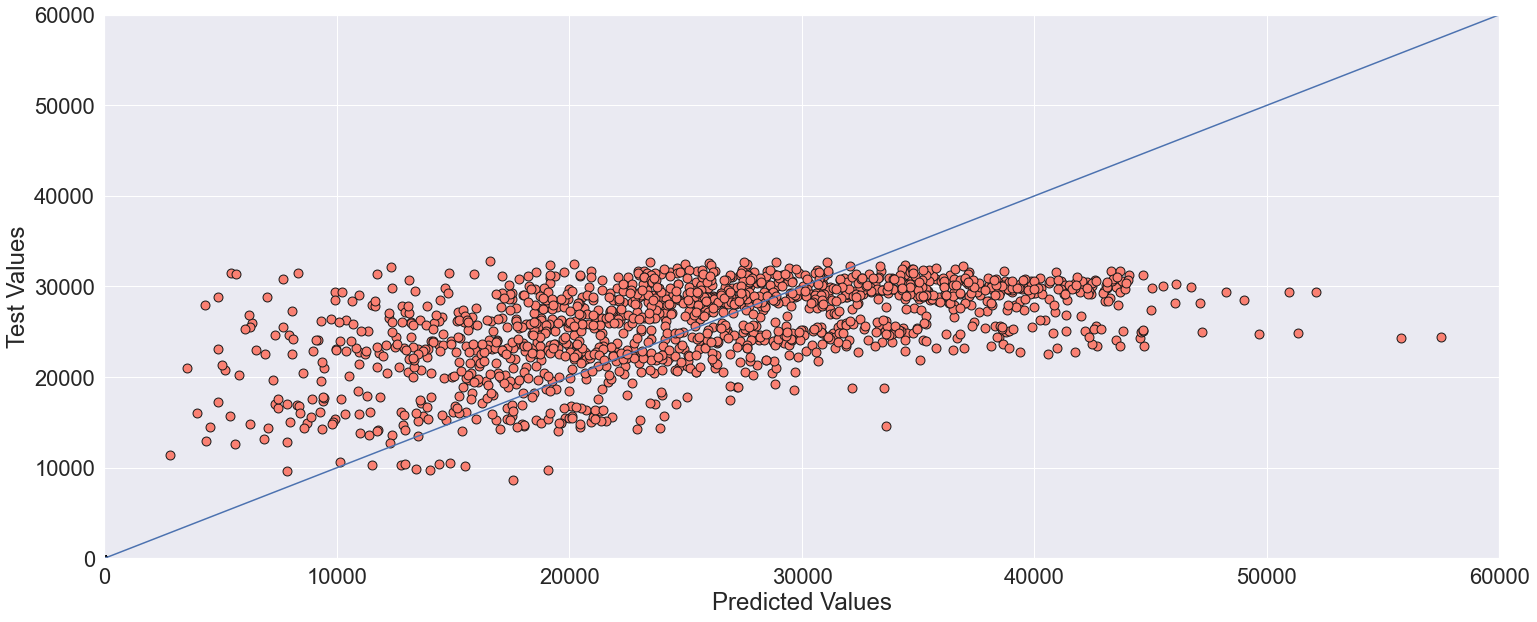

In [37]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot([0,60000],[0,60000])
plt.xlim(0,60000)
plt.ylim(0,60000);

# 2. Machine Learning with TFL Data, Weather Data and Holiday Data

Merging 'weather_data' to 'daily_data' as 'final_data'

In [38]:
final_data=data_daily.merge(weatherdata, on='Date', how='inner')
final_data.head()

Date       DAY  DAY_NUMBER WEEKDAY_WEEKEND  ST_DAY  ST_MONTH   Month  \
0 2010-07-30    Friday           4         Weekday      30         7    July   
1 2010-07-31  Saturday           5         Weekend      31         7    July   
2 2010-08-01    Sunday           6         Weekend       1         8  August   
3 2010-08-02    Monday           0         Weekday       2         8  August   
4 2010-08-03   Tuesday           1         Weekday       3         8  August   

   ST_YEAR  Non_work_day  Wkday_Wend  ...  cloudcover  humidity  precipMM  \
0     2010           0.0         1.0  ...          39        70       0.0   
1     2010           0.0         0.0  ...          74        81       2.0   
2     2010           0.0         0.0  ...          57        77       2.9   
3     2010           0.0         1.0  ...          33        75       7.3   
4     2010           0.0         1.0  ...          37        77       0.1   

   pressure  tempC  visibility  winddirDegree windspeedKmph location  \
0      1015     24           9            269             9   London   
1      1012     22           8            237            12   London   
2      1013     22           9            257             8   London   
3      1017     22           9            257             8   London   
4      1016     23           7            252             9   London   

       Dates  
0 2010-07-30  
1 2010-07-31  
2 2010-08-01  
3 2010-08-02  
4 2010-08-03  

[5 rows x 36 columns]

In [39]:
final_data.columns

Index(['Date', 'DAY', 'DAY_NUMBER', 'WEEKDAY_WEEKEND', 'ST_DAY', 'ST_MONTH',
       'Month', 'ST_YEAR', 'Non_work_day', 'Wkday_Wend',
       'Number_of_Bicycle_Hires', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'location', 'Dates'],
      dtype='object')

Merging with weather data adds a number of features to the data. While some of them look very important, the others doesnt look like have much importance to the data (for example : moon_illumination). To leave nothing to chance, data correlation was plotted and only features with high correaltion were considered for the analysis.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

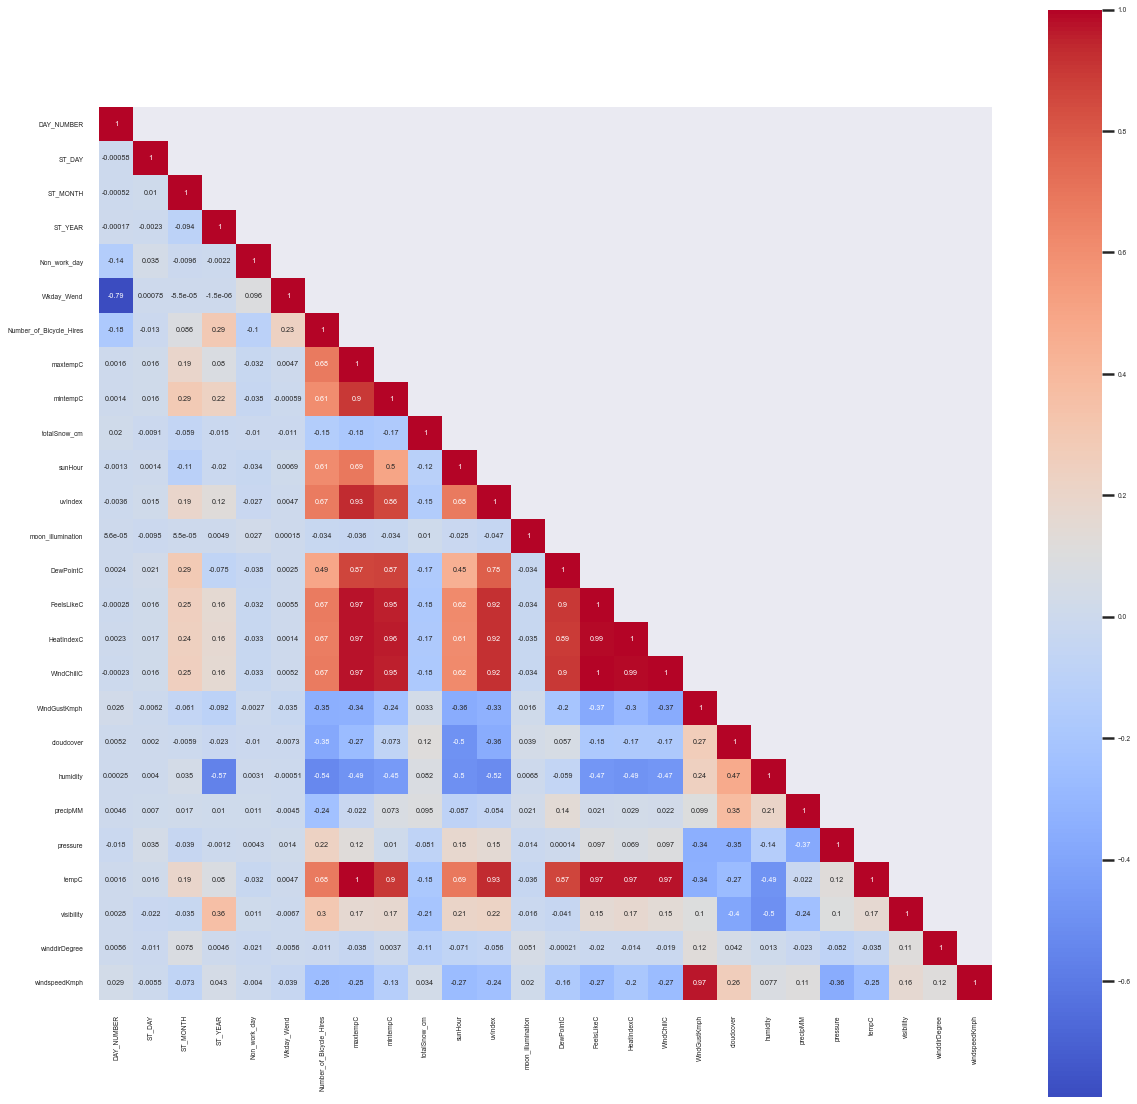

In [40]:
data_corr = final_data.corr()
mask = np.array(data_corr)
sns.set_context('poster',font_scale=0.3)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,20))
sns.heatmap(data_corr, mask=mask, vmax=1, square=True, annot=True, cmap='coolwarm');

Observation: 

From the correaltion heatmap, it can be seen that the Number of Bicycle Hires are positively correlated to  
1. 'ST_YEAR' 
2. 'Weekday/Weekend'
3. 'Max Temperature'
4. 'Minimum Temperature'
5. 'Sun hour'
6. 'UV Index'
7. 'Feel Like C'
8. 'Heat Index'
9. 'Wind Chill' 
10. 'Pressure', 
11. 'Temperature'
12. 'Visibility'.
13. 'Workday'
14. 'Non Work_day'
 

One Hot Encoding :

In [41]:
all_data = pd.concat([final_data, pd.get_dummies(final_data.ST_YEAR, prefix = 'Time')],axis = 1)
# all_data = pd.concat([all_data, pd.get_dummies(final_data['WEEKDAY_WEEKEND'], prefix = 'W')],axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
all_data.head()

Date       DAY  DAY_NUMBER WEEKDAY_WEEKEND  ST_DAY  ST_MONTH   Month  \
0 2010-07-30    Friday           4         Weekday      30         7    July   
1 2010-07-31  Saturday           5         Weekend      31         7    July   
2 2010-08-01    Sunday           6         Weekend       1         8  August   
3 2010-08-02    Monday           0         Weekday       2         8  August   
4 2010-08-03   Tuesday           1         Weekday       3         8  August   

   ST_YEAR  Non_work_day  Wkday_Wend  ...  Time_2012  Time_2013  Time_2014  \
0     2010           0.0         1.0  ...          0          0          0   
1     2010           0.0         0.0  ...          0          0          0   
2     2010           0.0         0.0  ...          0          0          0   
3     2010           0.0         1.0  ...          0          0          0   
4     2010           0.0         1.0  ...          0          0          0   

   Time_2015  Time_2016  Time_2017  Time_2018 Time_2019 Time_2020 Time_2021  
0          0          0          0          0         0         0         0  
1          0          0          0          0         0         0         0  
2          0          0          0          0         0         0         0  
3          0          0          0          0         0         0         0  
4          0          0          0          0         0         0         0  

[5 rows x 48 columns]

Linear Regression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 3697.170346128975
MSE: 26806118.028185353


<IPython.core.display.Javascript object>

RMSE: 5177.4625086218975


<IPython.core.display.Javascript object>

MAPE: 20.005804914366017


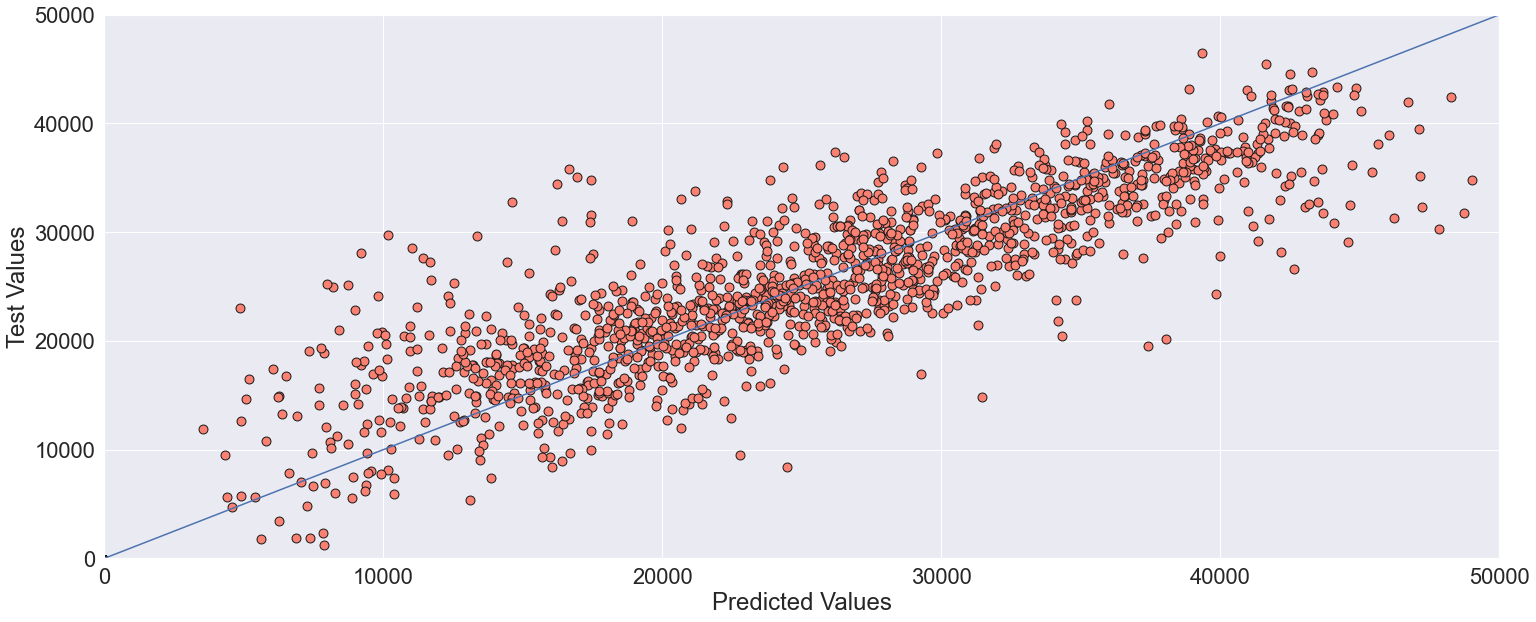

In [43]:
X = all_data[['ST_DAY', 'ST_MONTH','maxtempC','mintempC','sunHour', 'uvIndex','FeelsLikeC',
       'HeatIndexC', 'WindChillC','tempC','pressure','visibility','Time_2010', 'Time_2011',
       'Time_2012', 'Time_2013', 'Time_2014', 'Time_2015', 'Time_2016',
       'Time_2017', 'Time_2018', 'Time_2019', 'Time_2020', 'Time_2021',
       'Wkday_Wend','Non_work_day']]
y = all_data['Number_of_Bicycle_Hires']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )

plt.xlim(0,50000)
plt.ylim(0,50000);

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)

Decision Tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 4201.925520254994
MSE: 31202192.824757386


<IPython.core.display.Javascript object>

RMSE: 5585.892303361871


<IPython.core.display.Javascript object>

MAPE: 21.583984723717712


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

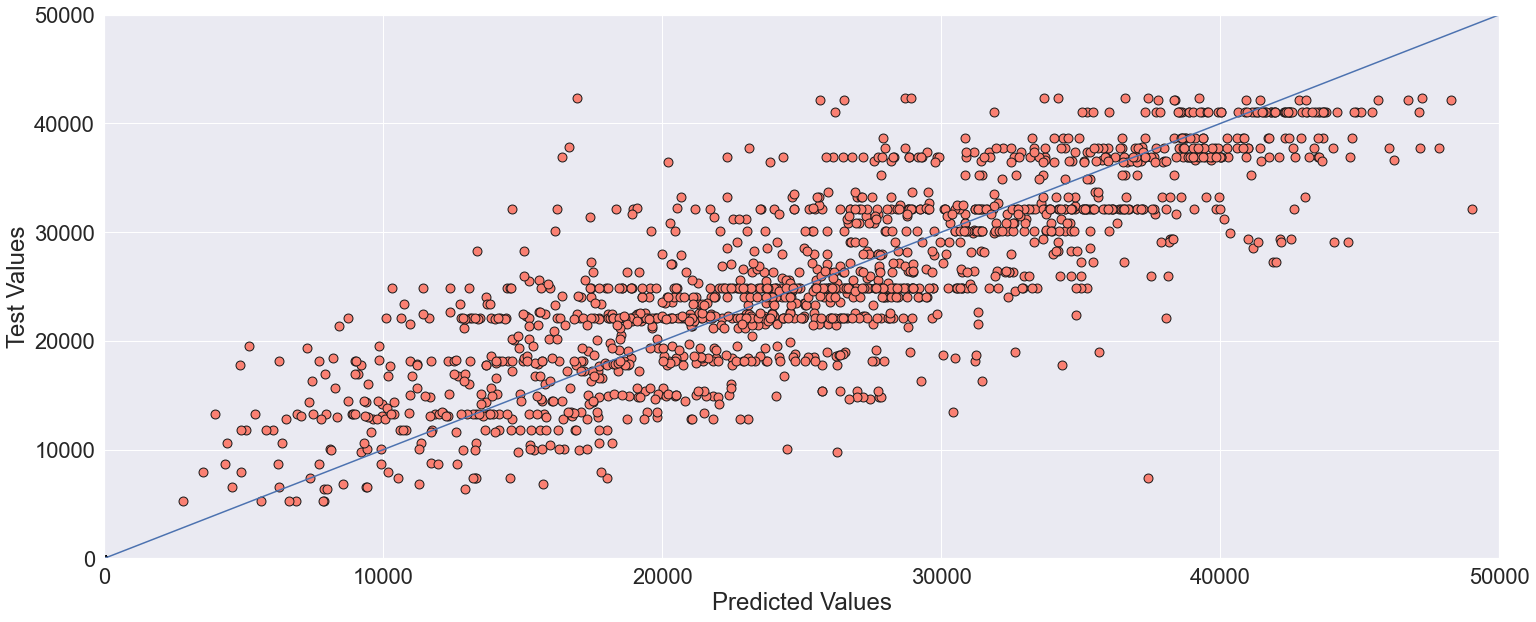

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_


# Training with best parameters
# from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )

plt.xlim(0,50000)
plt.ylim(0,50000);


Random Forest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 3346.308408843835
MSE: 20404781.17254207


<IPython.core.display.Javascript object>

RMSE: 4517.165169942546


<IPython.core.display.Javascript object>

MAPE: 17.454404547662005


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

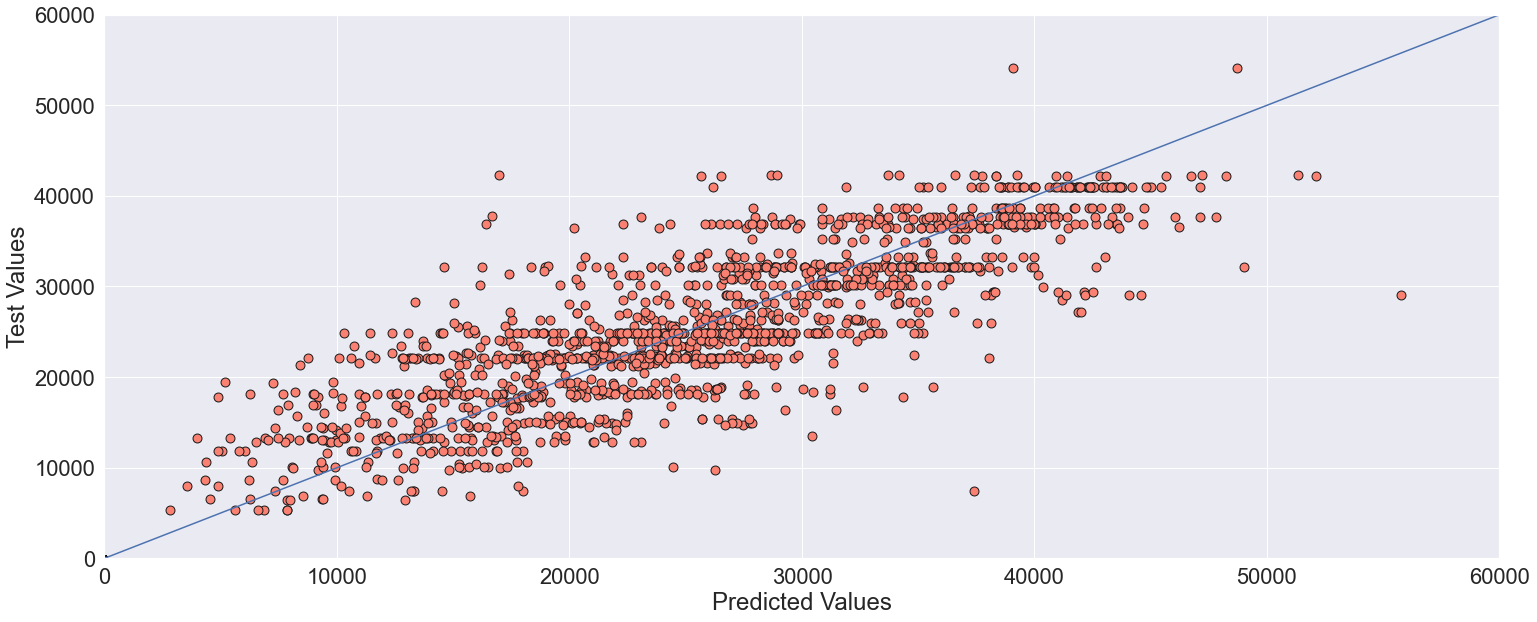

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),
             'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],
                           min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);



AdaBoostRegressor

<IPython.core.display.Javascript object>

MAE: 3407.743818155124
MSE: 20730764.841587435


<IPython.core.display.Javascript object>

RMSE: 4553.104967117213


<IPython.core.display.Javascript object>

MAPE: 17.59327654716774


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

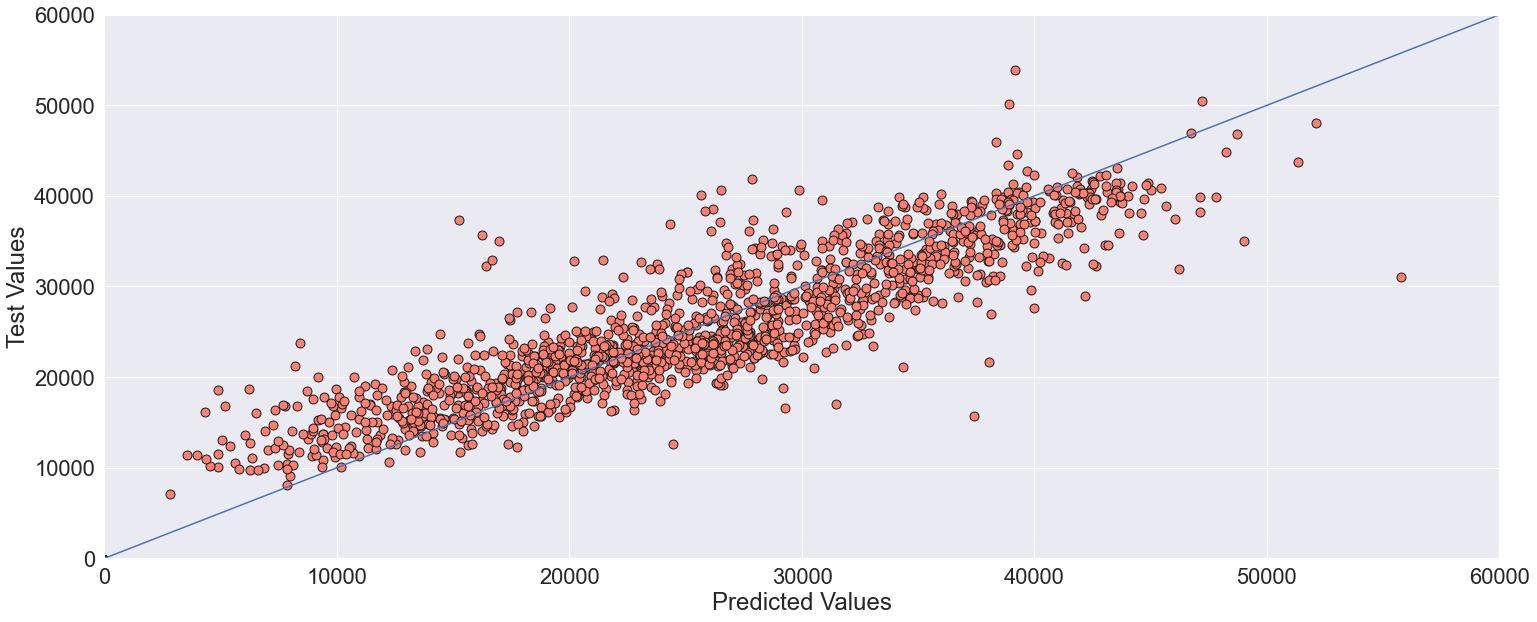

In [46]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test);


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  y_pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,y_pred,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);

Neural Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=25)

In [48]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_test.values,y_test.values),batch_size=128,verbose=0,epochs=400,callbacks=[early_stop]);

<IPython.core.display.Javascript object>

<AxesSubplot:>

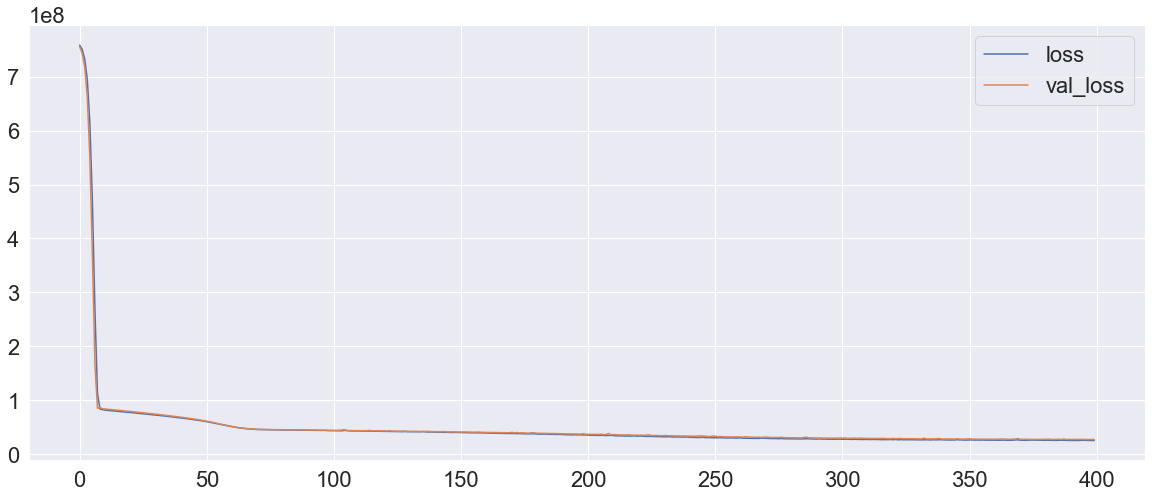

In [49]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(20,8))

MAE: 3789.3524182637534
MSE: 27047692.17494456


<IPython.core.display.Javascript object>

RMSE: 5200.739579612169


<IPython.core.display.Javascript object>

MAPE: 20.095747920314153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

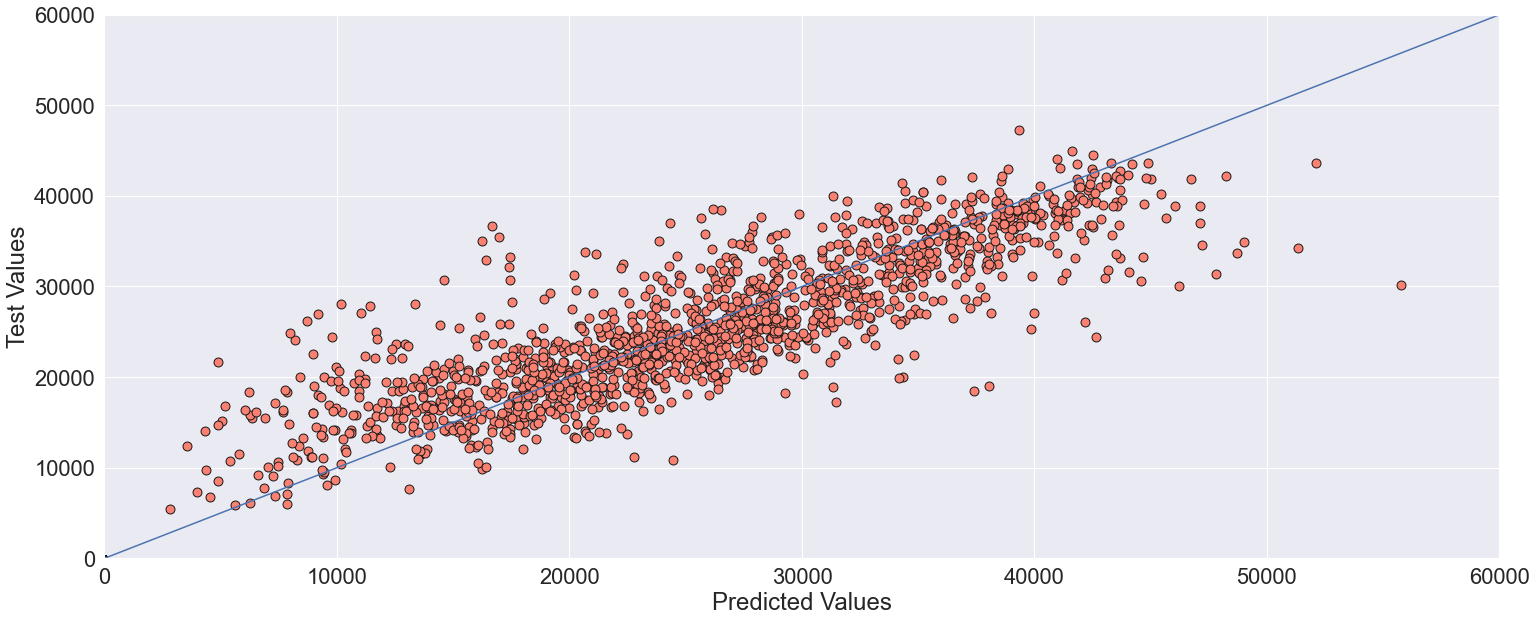

In [50]:
predictions = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot([0,60000],[0,60000])
plt.xlim(0,60000)
plt.ylim(0,60000);

# 3. Machine Learning with TFL Data, Power Generation Data and Holiday Data


In [51]:
final_data_all=data_daily.merge(power_generation, on='Date', how='inner')
final_data_all.head()

Date       DAY  DAY_NUMBER WEEKDAY_WEEKEND  ST_DAY  ST_MONTH   Month  \
0 2010-07-30    Friday           4         Weekday      30         7    July   
1 2010-07-31  Saturday           5         Weekend      31         7    July   
2 2010-08-01    Sunday           6         Weekend       1         8  August   
3 2010-08-02    Monday           0         Weekday       2         8  August   
4 2010-08-03   Tuesday           1         Weekday       3         8  August   

   ST_YEAR  Non_work_day  Wkday_Wend  ...  Wind  OCGT  Oil  Biomass  \
0     2010           0.0         1.0  ...  4841    15    0        0   
1     2010           0.0         0.0  ...  7013     0    0        0   
2     2010           0.0         0.0  ...  4264     0    0        0   
3     2010           0.0         1.0  ...   866     0    0        0   
4     2010           0.0         1.0  ...  5358     4    0        0   

   French Int  Dutch Int  NI Int  Eire Int  Nemo Int  Net Supply  
0       44898          0   -7411         0         0      781168  
1       46443          0   -4932         0         0      693004  
2       47760          0   -5775         0         0      674225  
3       45391          0   -7895         0         0      782488  
4       45788          0   -7593         0         0      784771  

[5 rows x 26 columns]

Similar to the earlier analysis, correaltion with the Power Generation Data has been checked to consider features that are important for the analysis.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

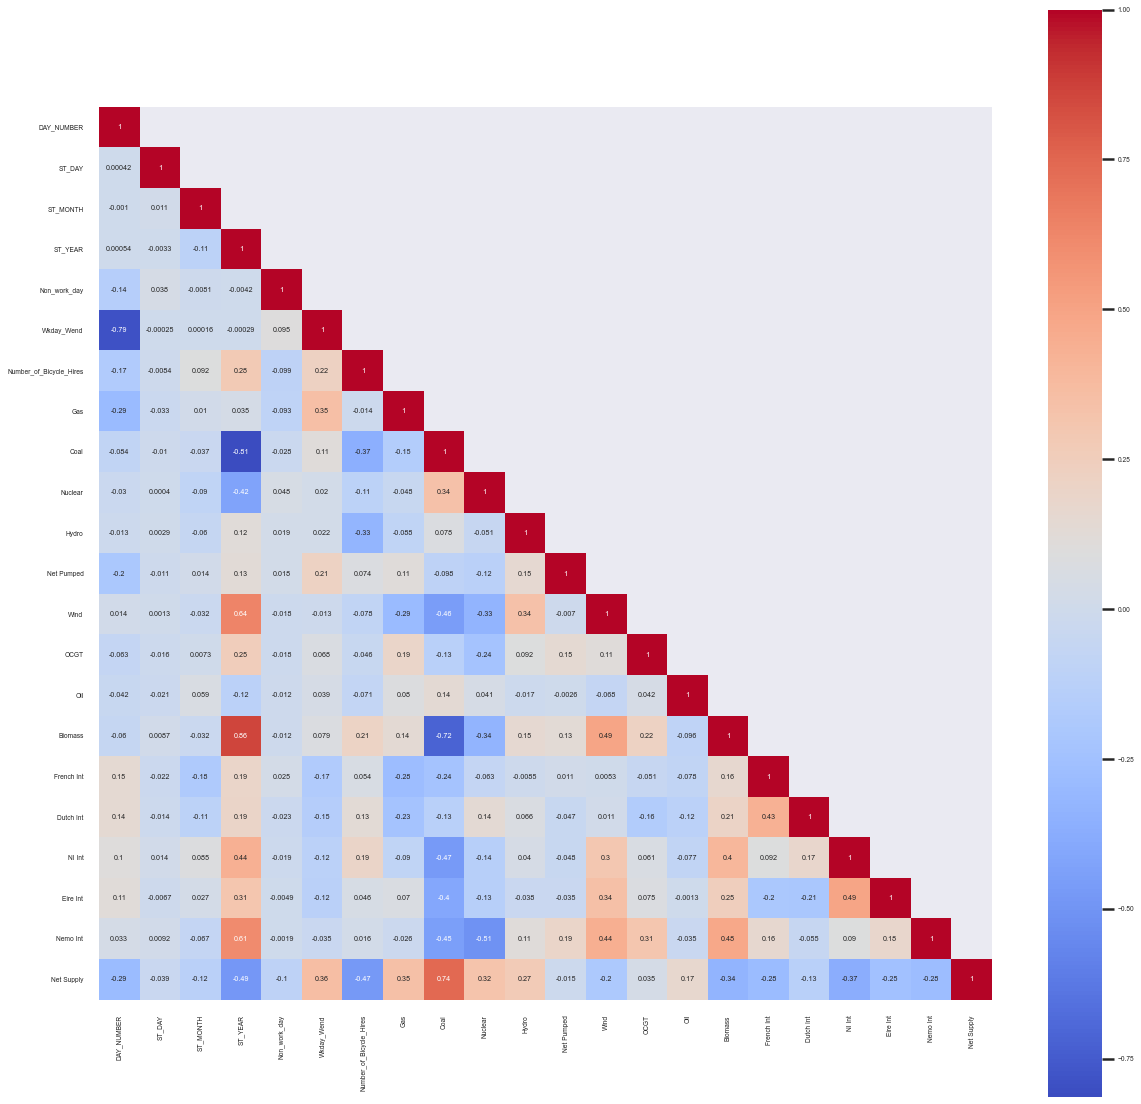

In [52]:
data_corr = final_data_all.corr()
mask = np.array(data_corr)
sns.set_context('poster',font_scale=0.3)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,20))
sns.heatmap(data_corr, mask=mask, vmax=1, square=True, annot=True, cmap='coolwarm');

Observation: 

From the correaltion heatmap, it can be seen that the Number of Bicycle Hires are positively correlated to  
1. 'ST_YEAR' 
2. 'Weekday/Weekend'
3. 'NI Int'
4. 'Dutch Int'
5. 'Biomass'
6. 'Net Pumped'
7. 'Hydro'
8.  Holiday data

In [60]:
# One Hot Encoding
all_data_we_power_ = pd.concat([final_data_all, pd.get_dummies(final_data.ST_YEAR, prefix = 'Time')],
                               join="inner",axis = 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
all_data_we_power_.columns

Index(['Date', 'DAY', 'DAY_NUMBER', 'WEEKDAY_WEEKEND', 'ST_DAY', 'ST_MONTH',
       'Month', 'ST_YEAR', 'Non_work_day', 'Wkday_Wend',
       'Number_of_Bicycle_Hires', 'Gas', 'Coal', 'Nuclear', 'Hydro',
       'Net Pumped', 'Wind', 'OCGT', 'Oil', 'Biomass', 'French Int',
       'Dutch Int', 'NI Int', 'Eire Int', 'Nemo Int', 'Net Supply',
       'Time_2010', 'Time_2011', 'Time_2012', 'Time_2013', 'Time_2014',
       'Time_2015', 'Time_2016', 'Time_2017', 'Time_2018', 'Time_2019',
       'Time_2020', 'Time_2021'],
      dtype='object')

Linear Regression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 5642.142411328746
MSE: 53621123.67172837


<IPython.core.display.Javascript object>

RMSE: 7322.6445818248185


<IPython.core.display.Javascript object>

MAPE: 28.294825644274884


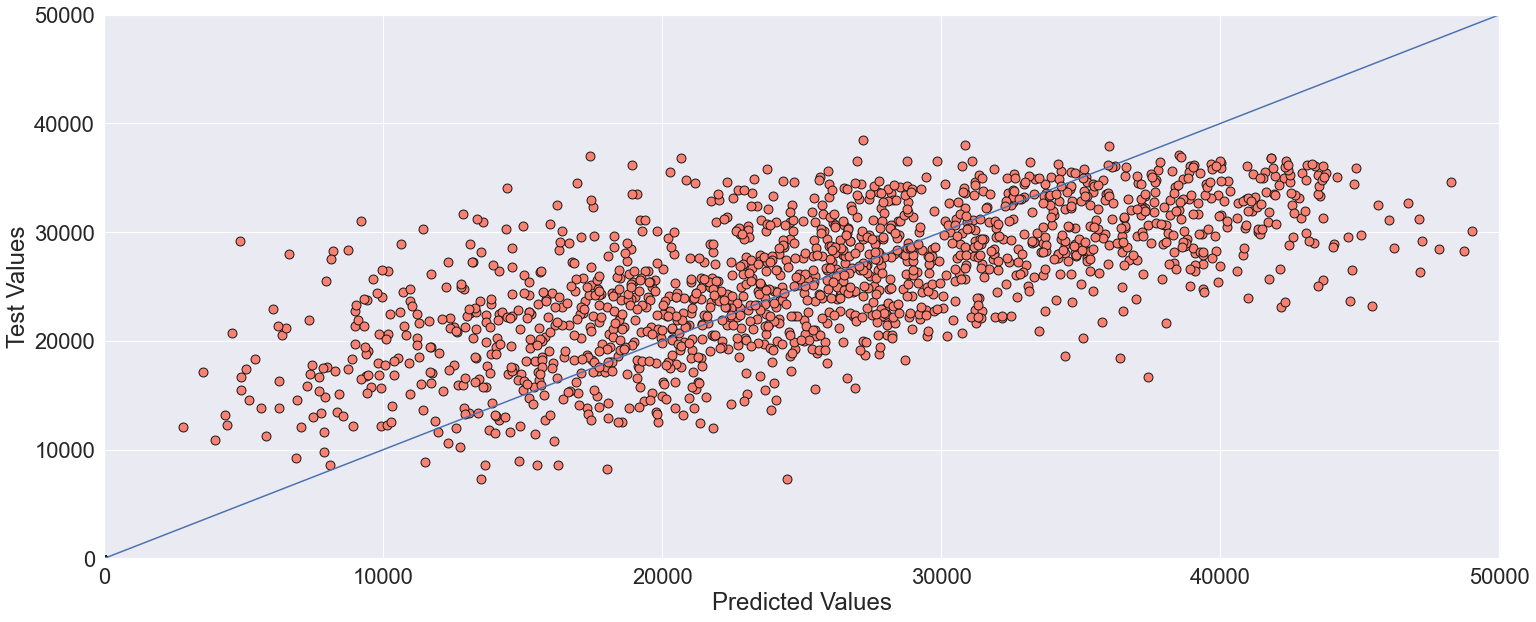

In [64]:
X = all_data_we_power_[['ST_DAY', 'ST_MONTH','Time_2010', 'Time_2011',
       'Time_2012', 'Time_2013', 'Time_2014', 'Time_2015', 'Time_2016',
       'Time_2017', 'Time_2018', 'Time_2019', 'Time_2020', 'Time_2021',
       'Wkday_Wend','Dutch Int', 'NI Int','Biomass','Net Pumped','Hydro','Non_work_day']]
y = all_data_we_power_['Number_of_Bicycle_Hires']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )

plt.xlim(0,50000)
plt.ylim(0,50000);

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)

Decision Tree Regressor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 4574.233304022374
MSE: 37663342.62558781


<IPython.core.display.Javascript object>

RMSE: 6137.046734838167


<IPython.core.display.Javascript object>

MAPE: 23.713655004369922


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

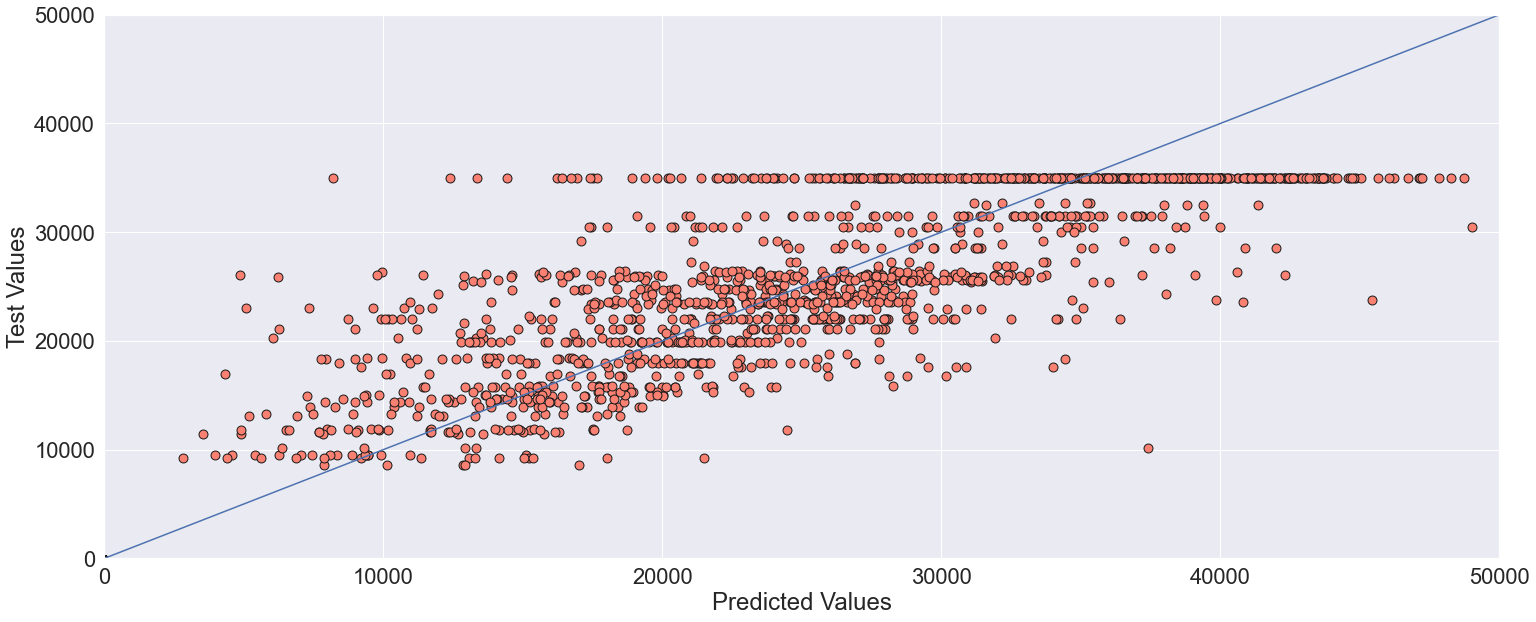

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_


# Training with best parameters
# from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)


plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )

plt.xlim(0,50000)
plt.ylim(0,50000);

Random Forest Regressor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 4048.1705546090575
MSE: 31409018.711777043


<IPython.core.display.Javascript object>

RMSE: 5604.374961739894


<IPython.core.display.Javascript object>

MAPE: 21.65540203619344


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

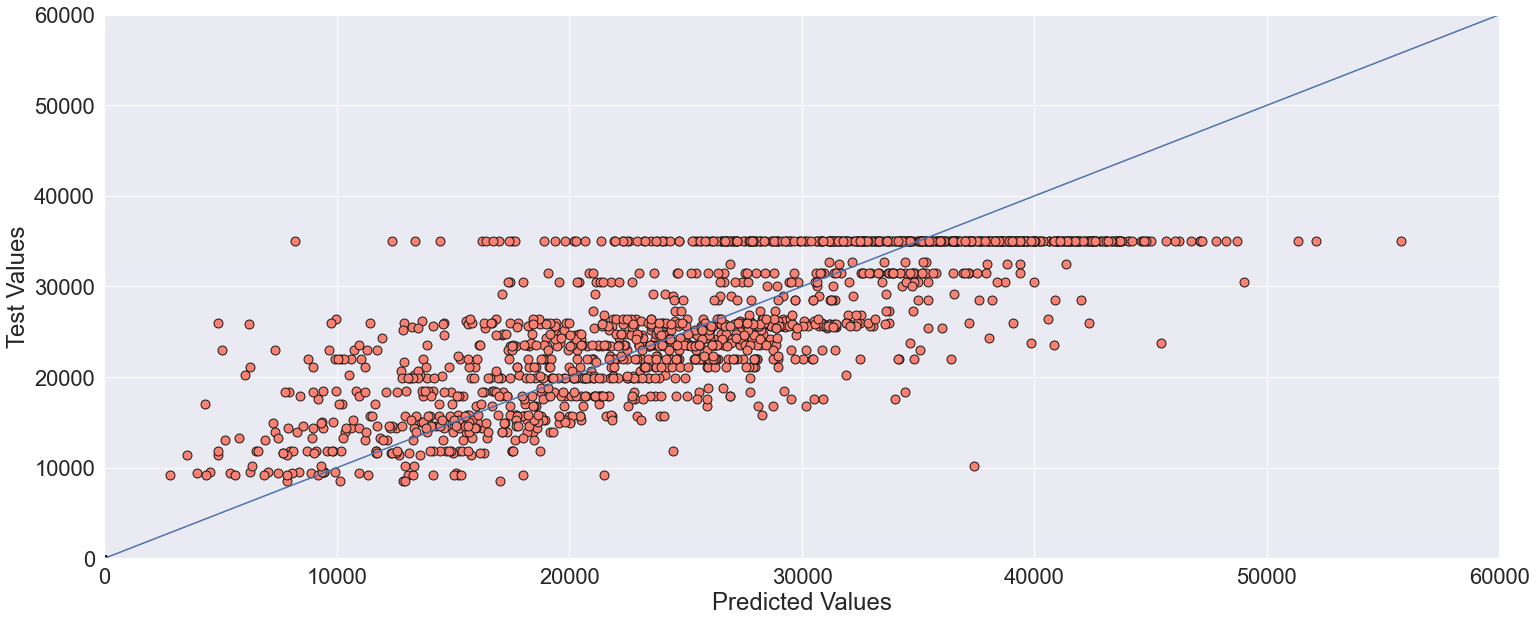

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),
             'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],
                           min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)


plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);


ADA BOOST Regressor

<IPython.core.display.Javascript object>

MAE: 4262.680841759298
MSE: 32542961.36442178


<IPython.core.display.Javascript object>

RMSE: 5704.643842030962


<IPython.core.display.Javascript object>

MAPE: 22.042842728375092


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

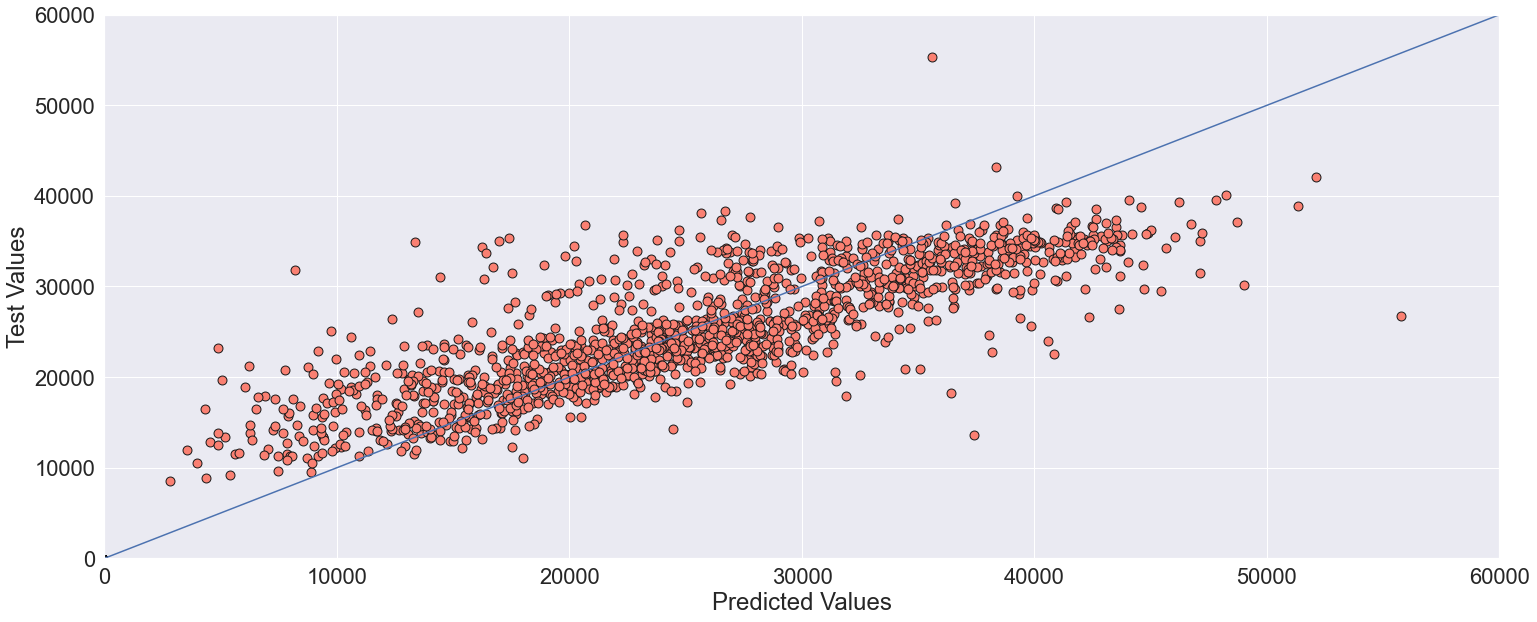

In [67]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test);

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  y_pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,y_pred,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);

Neural Network 

In [76]:
X = all_data_we_power_[['ST_DAY', 'ST_MONTH','Time_2010', 'Time_2011',
       'Time_2012', 'Time_2013', 'Time_2014', 'Time_2015', 'Time_2016',
       'Time_2017', 'Time_2018', 'Time_2019', 'Time_2020', 'Time_2021',
       'Wkday_Wend','Dutch Int', 'NI Int','Biomass','Net Pumped','Hydro','Non_work_day']]
y = all_data_we_power_['Number_of_Bicycle_Hires']


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=25)


model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_test.values,y_test.values),batch_size=128,epochs=400,verbose=0,callbacks=[early_stop]);

<IPython.core.display.Javascript object>

<AxesSubplot:>

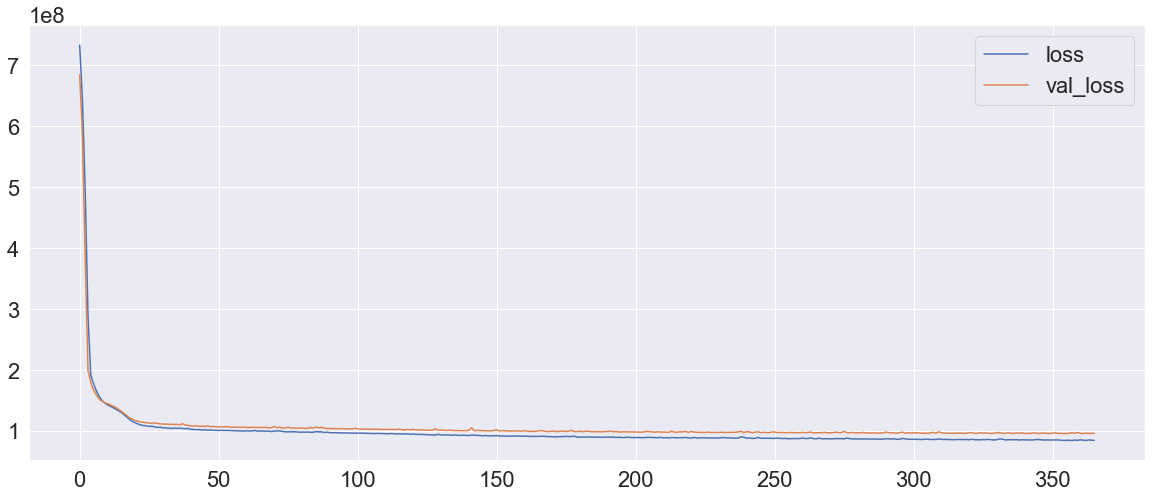

In [69]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(20,8))

MAE: 7501.120100021362
MSE: 95543441.2788945


<IPython.core.display.Javascript object>

RMSE: 9774.632539328242


<IPython.core.display.Javascript object>

MAPE: 37.769349631363134


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

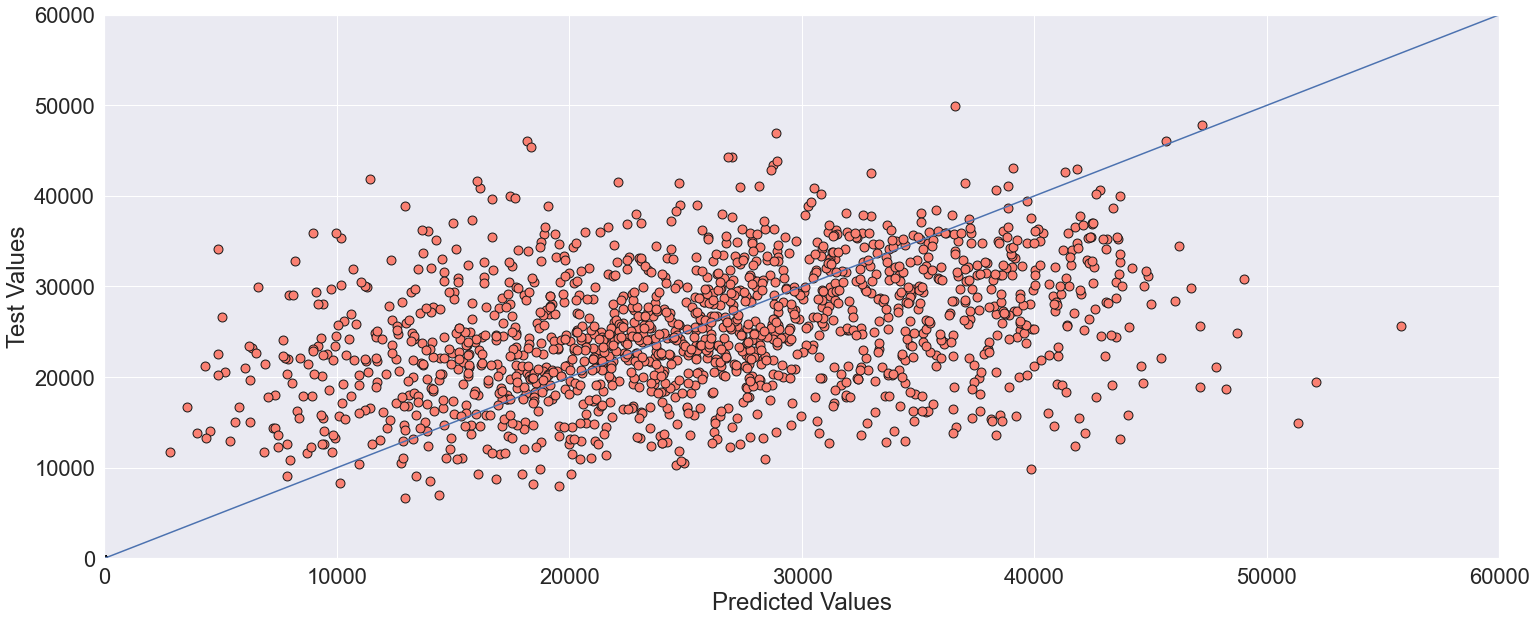

In [70]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot([0,60000],[0,60000])
plt.xlim(0,60000)
plt.ylim(0,60000);

# 4. Machine Learning with TFL Data, Power Generation Data, Weather Data and Holiday Data


Merging weather, power generation and holiday data into a new dataframe 'final_data_w_p_h'

In [71]:
final_data_w_p_h=final_data_all.merge(weatherdata, on='Date', how='outer')
final_data_w_p_h.head()

Date       DAY  DAY_NUMBER WEEKDAY_WEEKEND  ST_DAY  ST_MONTH   Month  \
0 2010-07-30    Friday         4.0         Weekday    30.0       7.0    July   
1 2010-07-31  Saturday         5.0         Weekend    31.0       7.0    July   
2 2010-08-01    Sunday         6.0         Weekend     1.0       8.0  August   
3 2010-08-02    Monday         0.0         Weekday     2.0       8.0  August   
4 2010-08-03   Tuesday         1.0         Weekday     3.0       8.0  August   

   ST_YEAR  Non_work_day  Wkday_Wend  ...  cloudcover  humidity  precipMM  \
0   2010.0           0.0         1.0  ...        39.0      70.0       0.0   
1   2010.0           0.0         0.0  ...        74.0      81.0       2.0   
2   2010.0           0.0         0.0  ...        57.0      77.0       2.9   
3   2010.0           0.0         1.0  ...        33.0      75.0       7.3   
4   2010.0           0.0         1.0  ...        37.0      77.0       0.1   

   pressure  tempC  visibility  winddirDegree  windspeedKmph  location  \
0    1015.0   24.0         9.0          269.0            9.0    London   
1    1012.0   22.0         8.0          237.0           12.0    London   
2    1013.0   22.0         9.0          257.0            8.0    London   
3    1017.0   22.0         9.0          257.0            8.0    London   
4    1016.0   23.0         7.0          252.0            9.0    London   

       Dates  
0 2010-07-30  
1 2010-07-31  
2 2010-08-01  
3 2010-08-02  
4 2010-08-03  

[5 rows x 51 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

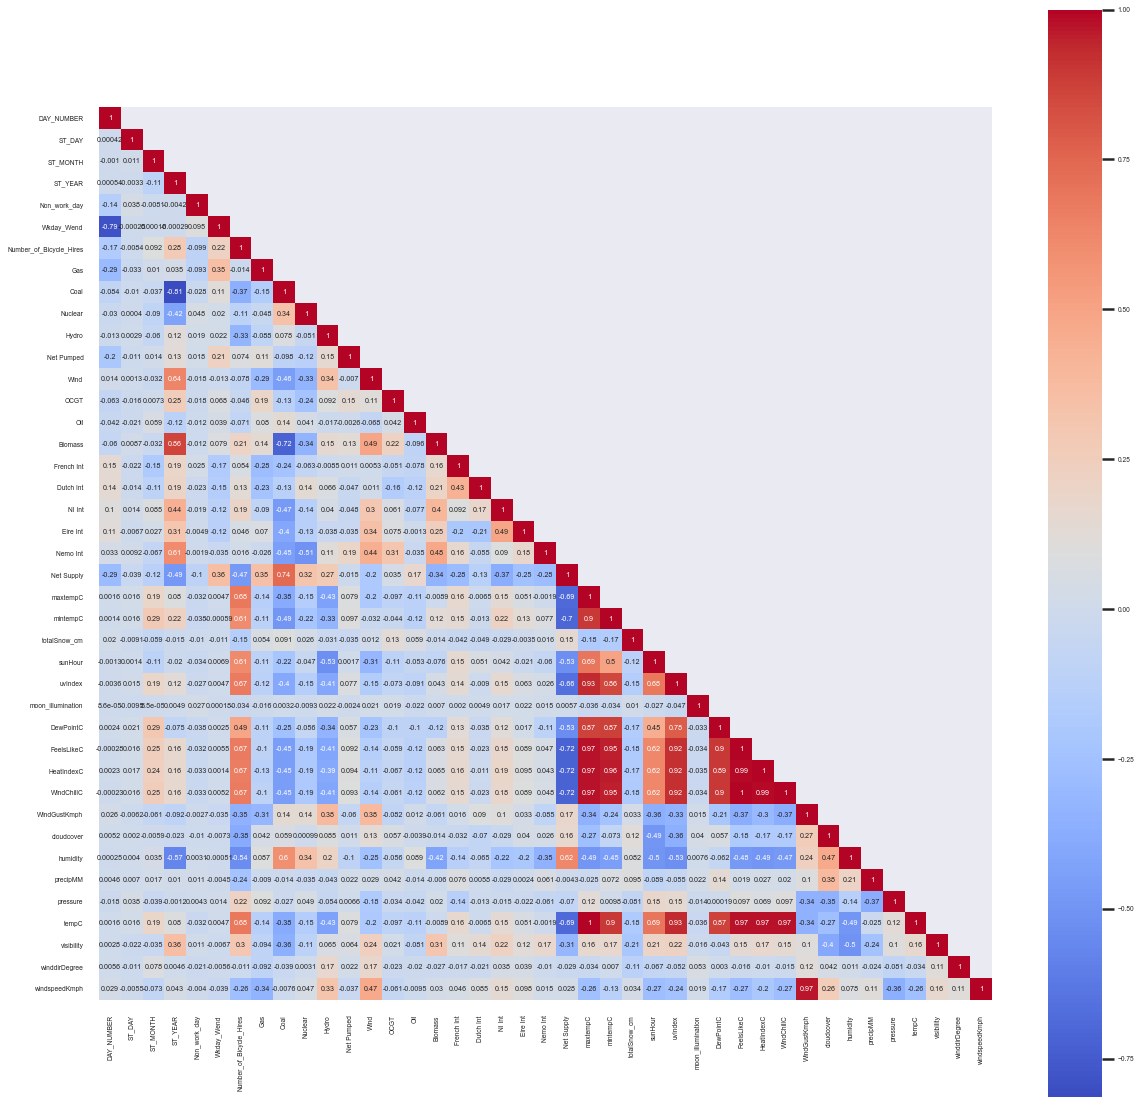

In [72]:
data_corr = final_data_w_p_h.corr()
mask = np.array(data_corr)
sns.set_context('poster',font_scale=0.3)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,20))
sns.heatmap(data_corr, mask=mask, vmax=1, square=True, annot=True, cmap='coolwarm');

From the correaltion heatmap, it can be seen that the Number of Bicycle Hires are positively correlated to

    1.'ST_YEAR'
    2.'Weekday/Weekend'
    3.'NI Int'
    4.'Dutch Int'
    5.'Biomass'
    6.'Net Pumped'
    7.'Hydro'
    8.'Holiday data'
    9.'Max Temperature'
    10.'Minimum Temperature'
    11.'Sun hour'
    12.'UV Index'
    13.'Feel Like C'
    14.'Heat Index'
    15.'Wind Chill'
    16.'Pressure',
    17.'Temperature'
    18.'Wkday_Wend'.
    19.'Non Work_day'
    

In [79]:
# One Hot Encoding
final_data_w_p_h = pd.concat([final_data_w_p_h, pd.get_dummies(final_data.ST_YEAR, prefix = 'Time')],join="inner",axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
X = final_data_w_p_h[['ST_DAY', 'ST_MONTH','Time_2010', 'Time_2011','maxtempC','mintempC','sunHour', 'uvIndex','FeelsLikeC',
       'HeatIndexC', 'WindChillC','tempC','pressure','visibility',
       'Time_2012', 'Time_2013', 'Time_2014', 'Time_2015', 'Time_2016',
       'Time_2017', 'Time_2018', 'Time_2019', 'Time_2020', 'Time_2021',
       'Wkday_Wend','Dutch Int', 'NI Int','Biomass','Net Pumped','Hydro','Non_work_day']]
y = final_data_w_p_h['Number_of_Bicycle_Hires']

Linear Regression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 3666.36094822546
MSE: 26326132.011711944


<IPython.core.display.Javascript object>

RMSE: 5130.899727310206


<IPython.core.display.Javascript object>

MAPE: 19.82588551994438


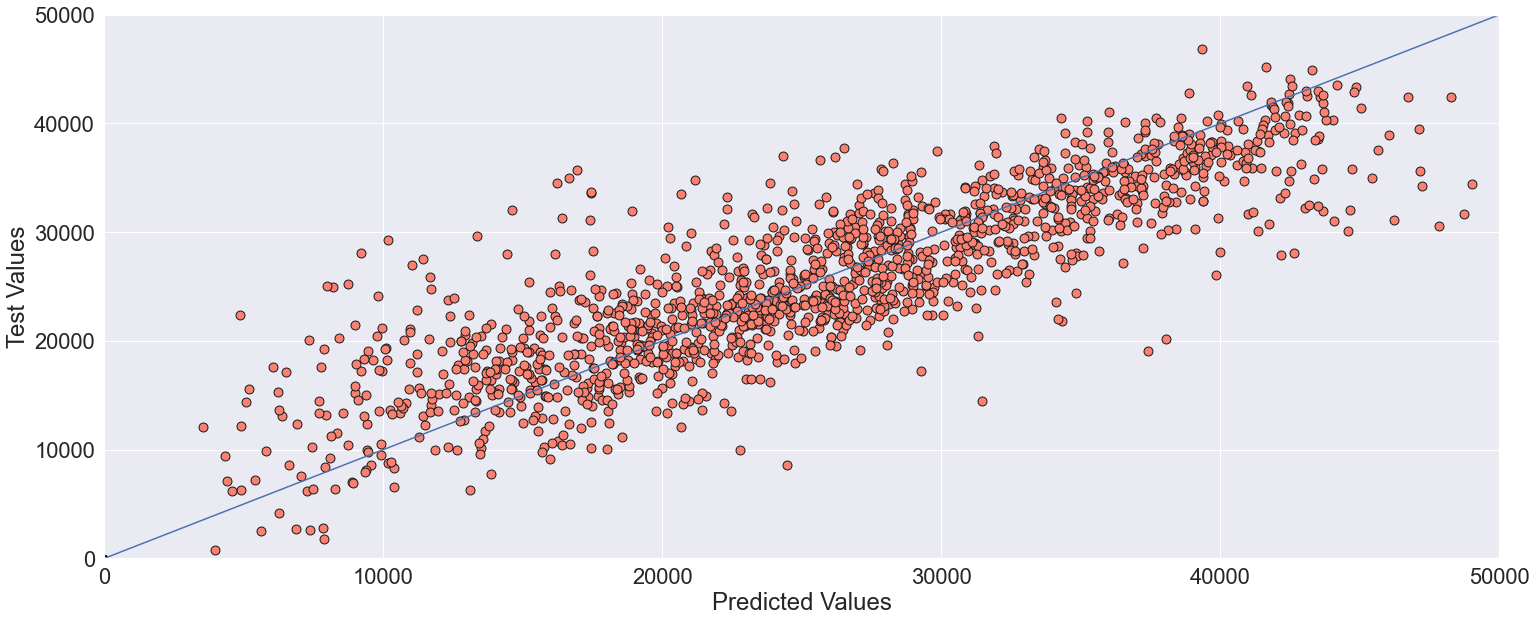

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )
plt.xlim(0,50000)
plt.ylim(0,50000);

# Metrics for Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)


Decision Tree Regressor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 3993.7803328896803
MSE: 29477343.405952264


<IPython.core.display.Javascript object>

RMSE: 5429.304136438874


<IPython.core.display.Javascript object>

MAPE: 20.978925331371965


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

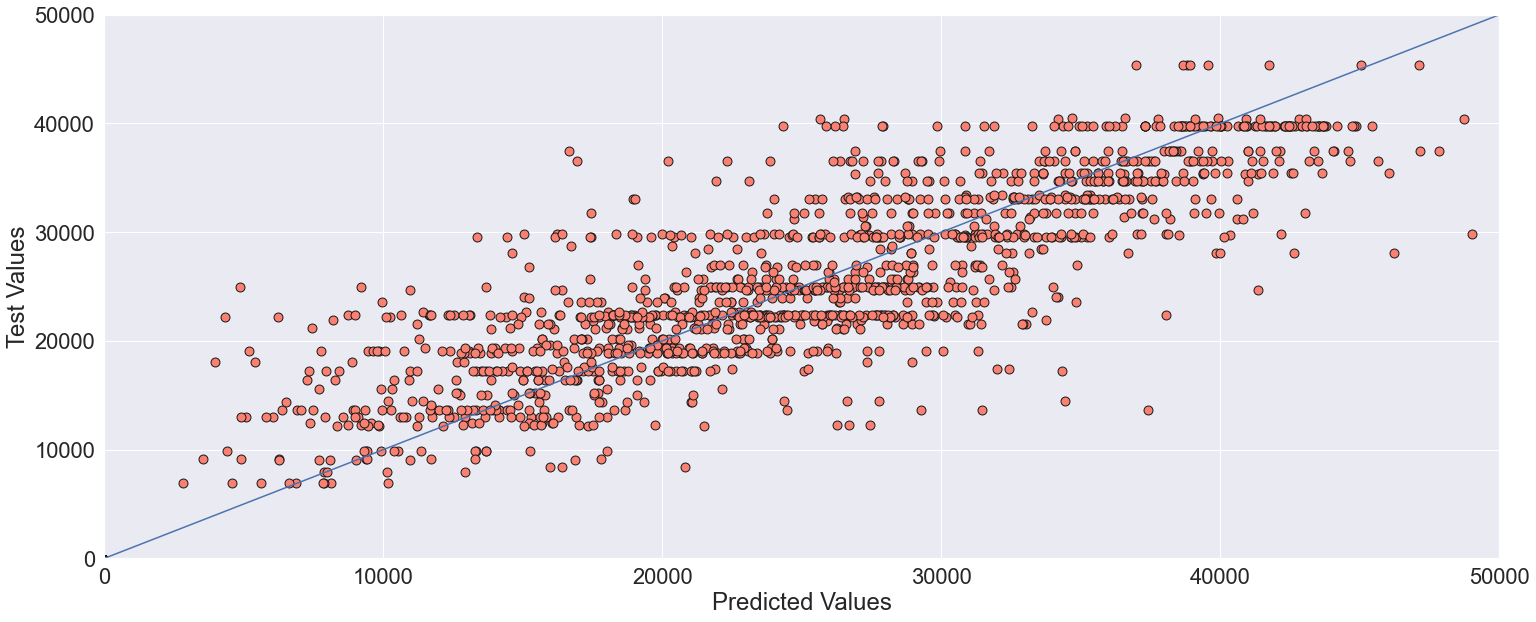

In [82]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_


# Training with best parameters
# from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)


plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,50000],[0,50000] )

plt.xlim(0,50000)
plt.ylim(0,50000);


Random Forest Regressor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 3239.430381445423
MSE: 19786632.520185925


<IPython.core.display.Javascript object>

RMSE: 4448.216779810301


<IPython.core.display.Javascript object>

MAPE: 17.187986772574643


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

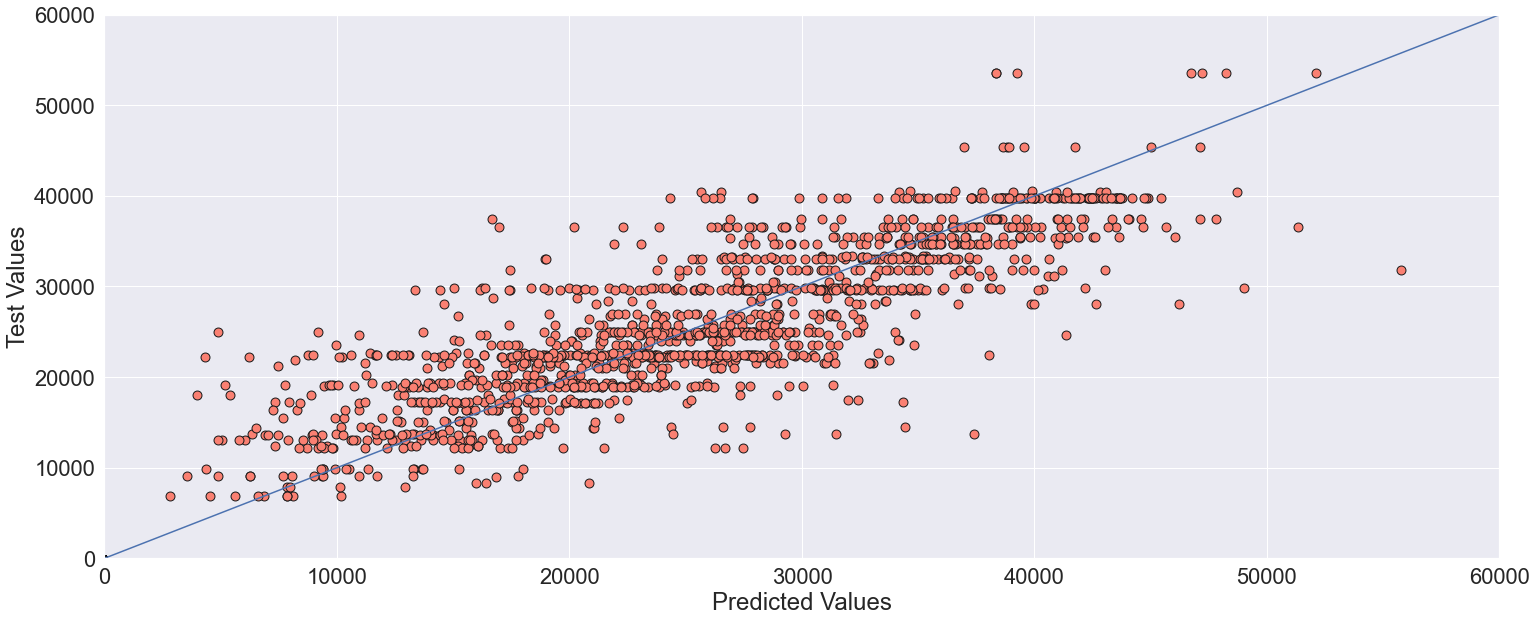

In [83]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),
             'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],
                           min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);



ADA BOOST Regressor

<IPython.core.display.Javascript object>

MAE: 3308.335644712972
MSE: 19738141.72342003


<IPython.core.display.Javascript object>

RMSE: 4442.7628479832265


<IPython.core.display.Javascript object>

MAPE: 17.166912685419593


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

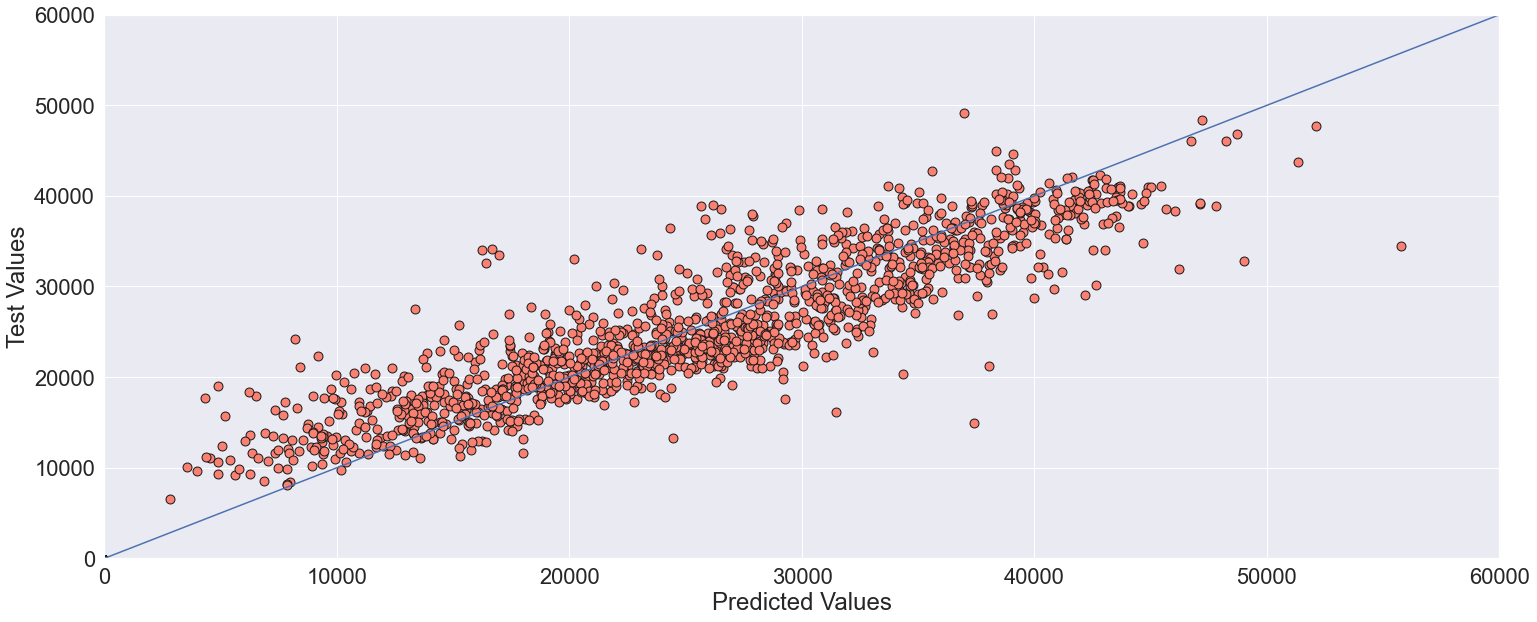

In [84]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test);

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  y_pred))/all_data['Number_of_Bicycle_Hires'].mean()*100)


plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,y_pred,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot( [0,60000],[0,60000] )

plt.xlim(0,60000)
plt.ylim(0,60000);

Neural Network

In [85]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=25)

In [103]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_test.values,y_test.values),batch_size=128,epochs=400,verbose=0,callbacks=[early_stop]);

In [104]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(20,8))

<IPython.core.display.Javascript object>

AttributeError: 'SARIMAX' object has no attribute 'history'

MAE: 4620.066754976909
MSE: 37343144.85865014


<IPython.core.display.Javascript object>

RMSE: 6110.903767745826


<IPython.core.display.Javascript object>

MAPE: 23.612638126186624


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

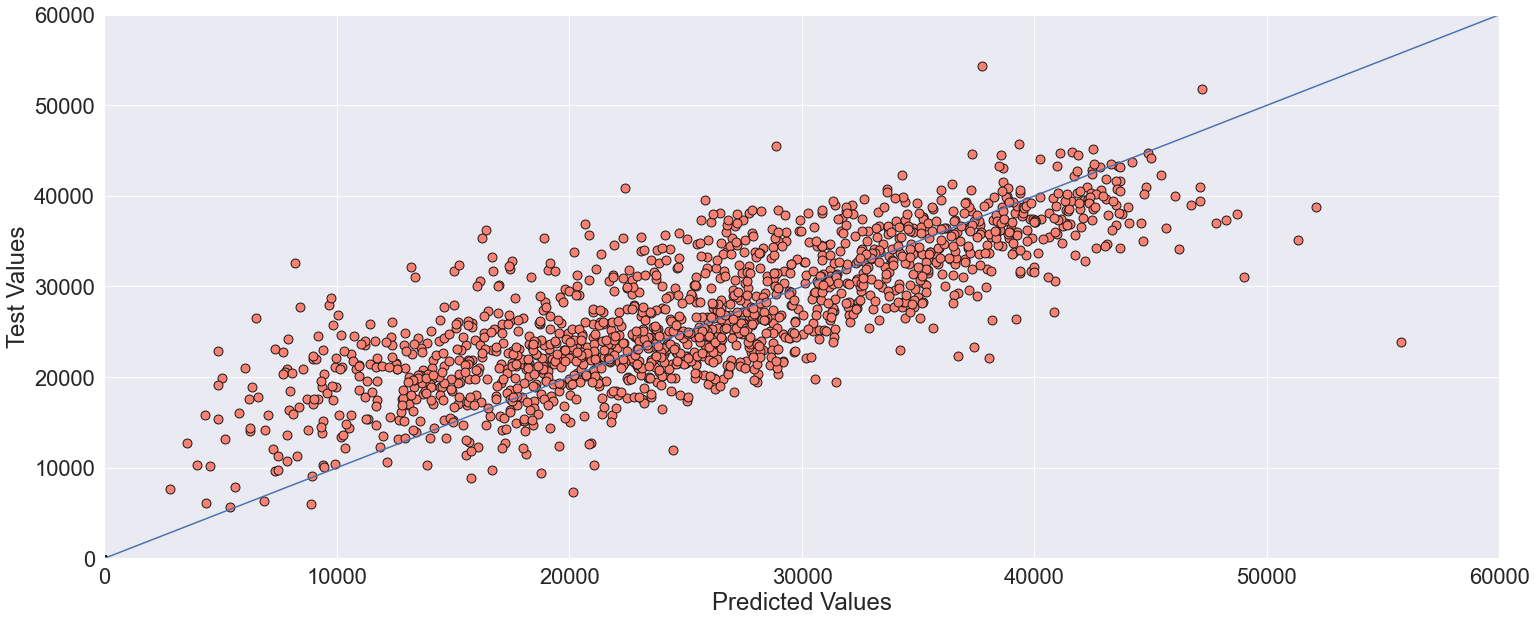

In [88]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                  predictions))/all_data['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(y_test,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot([0,60000],[0,60000])
plt.xlim(0,60000)
plt.ylim(0,60000);

# Time Series Analysis

In [89]:
data_daily_TS=data_daily[['Date','Number_of_Bicycle_Hires']]
data_daily_TS=data_daily_TS.set_index('Date')
data_daily_TS.head()

Number_of_Bicycle_Hires
Date                               
2010-07-30                   6897.0
2010-07-31                   5564.0
2010-08-01                   4303.0
2010-08-02                   6642.0
2010-08-03                   7966.0

# Train Test Split

The Train Test split for time series analysis has not been done in a traditional manner using the train_test_split( ) library. This is to ensure the continuity of the data which also takes care of the autocorrelation factor among the observations.

In [90]:
train_data = data_daily_TS.iloc[:3000] # Goes up to but not including 3000
test_data = data_daily_TS.iloc[2999:]

# ARIMA MODELLING

In [91]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")

In [92]:
auto_arima(train_data['Number_of_Bicycle_Hires'])

ARIMA(order=(4, 1, 3), scoring_args={}, with_intercept=False)

# Fit an ARIMA(5,1,5) Model

In [93]:
model = ARIMA(train_data['Number_of_Bicycle_Hires'],order=(5,1,5))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Number_of_Bicycle_Hires   No. Observations:                 2999
Model:                        ARIMA(5, 1, 5)   Log Likelihood              -29691.853
Method:                              css-mle   S.D. of innovations                nan
Date:                       Sun, 09 May 2021   AIC                          59407.707
Time:                               02:36:46   BIC                          59479.779
Sample:                           07-31-2010   HQIC                         59433.631
                                - 10-15-2018                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               7.0500        nan        nan        nan         nan         nan
ar.L1.D.Number_of_Bicycle_Hires     1.1009    1.2e-05   9.17e+04      0.000       1.101       1.101
ar.L2.D.Number_of_Bicycle_Hires    -1.6852   1.51e-05  -1.11e+05      0.000      -1.685      -1.685
ar.L3.D.Number_of_Bicycle_Hires     1.2340   2.14e-05   5.78e+04      0.000       1.234       1.234
ar.L4.D.Number_of_Bicycle_Hires    -1.2397   2.26e-05  -5.48e+04      0.000      -1.240      -1.240
ar.L5.D.Number_of_Bicycle_Hires     0.2989   1.44e-06   2.07e+05      0.000       0.299       0.299
ma.L1.D.Number_of_Bicycle_Hires    -1.6543        nan        nan        nan         nan         nan
ma.L2.D.Number_of_Bicycle_Hires     2.1158        nan        nan        nan         nan         nan
ma.L3.D.Number_of_Bicycle_Hires    -2.0213        nan        nan        nan         nan         nan
ma.L4.D.Number_of_Bicycle_Hires     1.6593        nan        nan        nan         nan         nan
ma.L5.D.Number_of_Bicycle_Hires    -0.8395        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2224           -0.9750j            1.0000           -0.2857
AR.2           -0.2224           +0.9750j            1.0000            0.2857
AR.3            0.6234           -0.7819j            1.0000           -0.1429
AR.4            0.6234           +0.7819j            1.0000            0.1429
AR.5            3.3451           -0.0000j            3.3451           -0.0000
MA.1           -0.2224           -0.9789j            1.0039           -0.2856
MA.2           -0.2224           +0.9789j            1.0039            0.2856
MA.3            0.6274           -0.7872j            1.0066           -0.1429
MA.4            0.6274           +0.7872j            1.0066            0.1429
MA.5            1.1664           -0.0000j            1.1664           -0.0000
-----------------------------------------------------------------------------
"""

In [94]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, 
                              dynamic=False, typ='levels').rename('ARIMA(5,1,5) Predictions')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

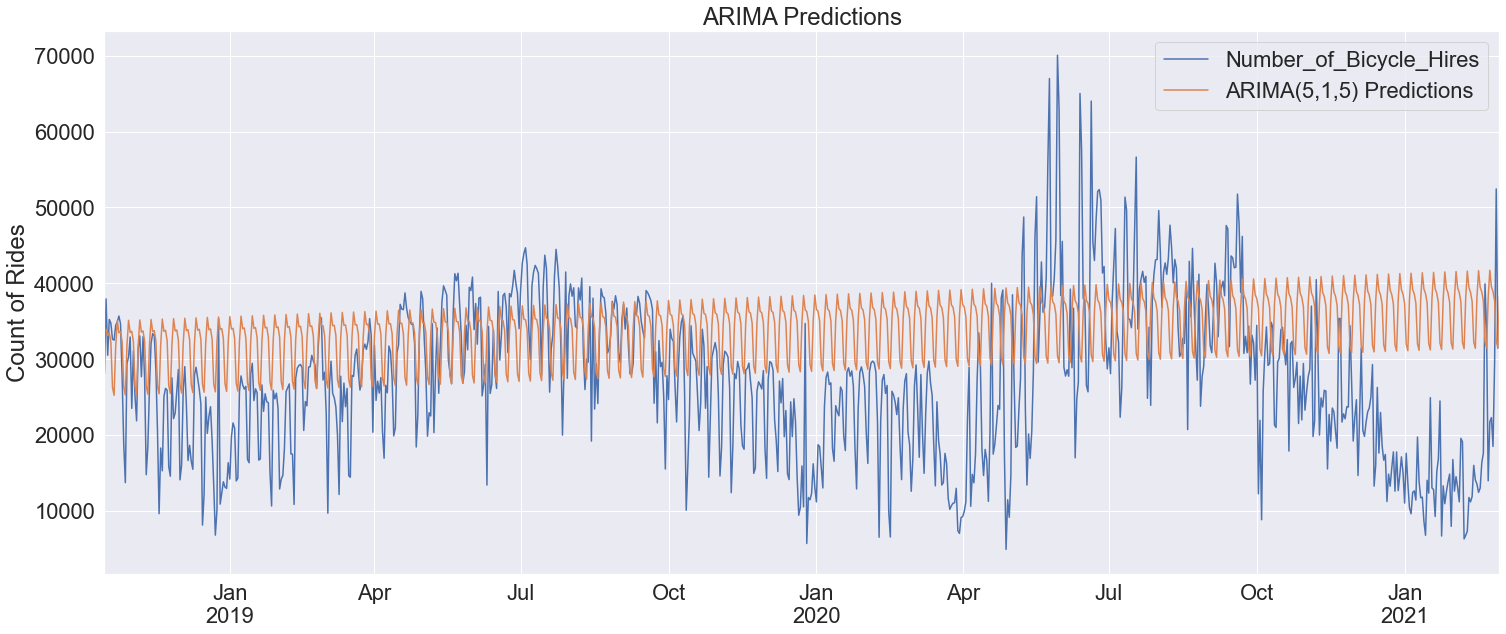

In [95]:
# Plot predictions against known values
title = 'ARIMA Predictions'
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
ylabel='Count of Rides'
xlabel='' # we don't really need a label here

ax = test_data['Number_of_Bicycle_Hires'].plot(legend=True,figsize=(25,10),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Evaluate the Model

MAE: 10373.604957164776
MSE: 169166593.90343535


<IPython.core.display.Javascript object>

RMSE: 13006.405879543947


<IPython.core.display.Javascript object>

MAPE: 50.35787336921409


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

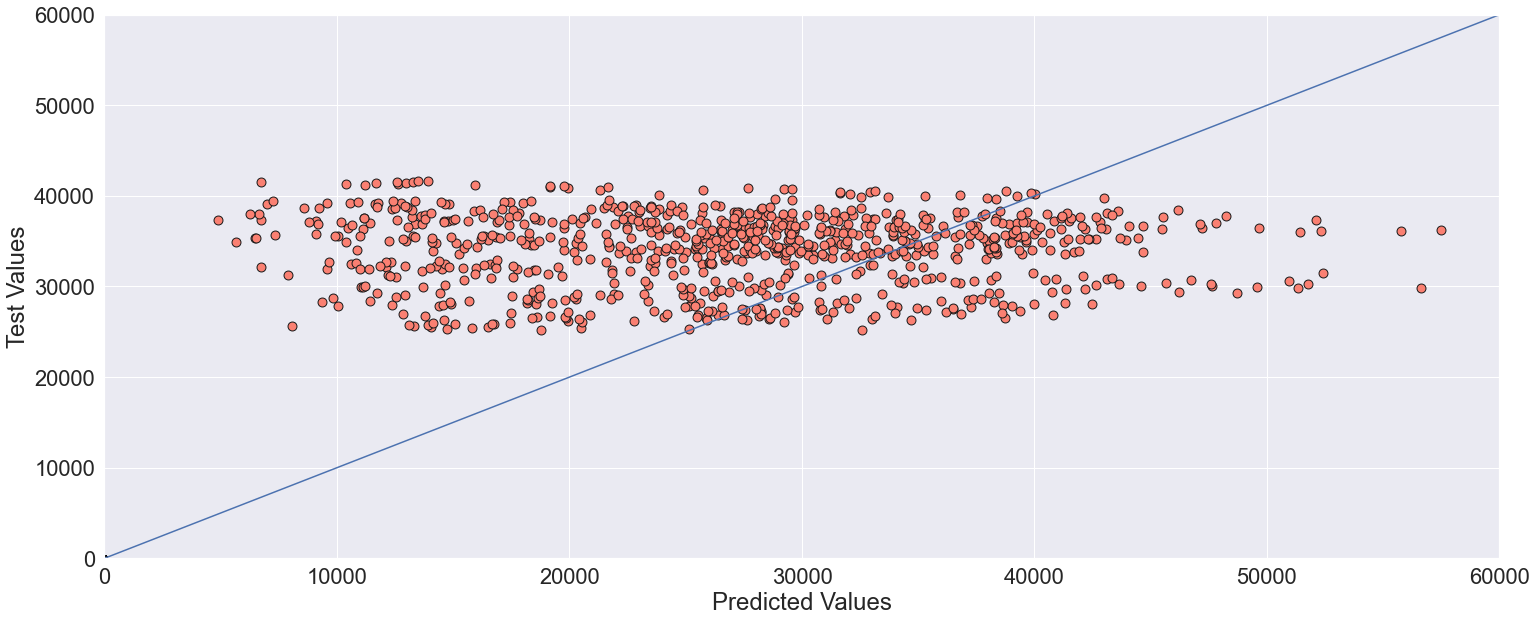

In [96]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

print('MAE:', metrics.mean_absolute_error(test_data['Number_of_Bicycle_Hires'], predictions))
print('MSE:', metrics.mean_squared_error(test_data['Number_of_Bicycle_Hires'], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_data['Number_of_Bicycle_Hires'], predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(test_data['Number_of_Bicycle_Hires'], 
                                                  predictions))/data_daily_TS['Number_of_Bicycle_Hires'].mean()*100)


plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(test_data,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot([0,60000],[0,60000])
plt.xlim(0,60000)
plt.ylim(0,60000);

# SARIMA MODELLING

In [97]:
auto_arima(data_daily_TS['Number_of_Bicycle_Hires'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3867
Model:             SARIMAX(5, 1, 4)x(1, 0, [], 12)   Log Likelihood              -38602.397
Date:                             Sun, 09 May 2021   AIC                          77226.795
Time:                                     02:56:35   BIC                          77295.654
Sample:                                          0   HQIC                         77251.246
                                            - 3867                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5226      0.032     16.265      0.000       0.460       0.586
ar.L2          0.2076      0.042      4.934      0.000       0.125       0.290
ar.L3         -1.0579      0.030    -35.799      0.000      -1.116      -1.000
ar.L4          0.2533      0.019     12.996      0.000       0.215       0.291
ar.L5          0.0390      0.019      2.087      0.037       0.002       0.076
ma.L1         -1.0923      0.028    -38.916      0.000      -1.147      -1.037
ma.L2         -0.0543      0.052     -1.045      0.296      -0.156       0.048
ma.L3          1.1574      0.050     23.268      0.000       1.060       1.255
ma.L4         -0.7983      0.024    -33.219      0.000      -0.845      -0.751
ar.S.L12      -0.1087      0.017     -6.364      0.000      -0.142      -0.075
sigma2      2.963e+07   4.08e-10   7.25e+16      0.000    2.96e+07    2.96e+07
===================================================================================
Ljung-Box (Q):                      419.75   Jarque-Bera (JB):              1762.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.49e+33. Standard errors may be unstable.
"""

In [98]:
train = data_daily_TS.iloc[:3000]
test = data_daily_TS.iloc[2999:]
train.head()

Number_of_Bicycle_Hires
Date                               
2010-07-30                   6897.0
2010-07-31                   5564.0
2010-08-01                   4303.0
2010-08-02                   6642.0
2010-08-03                   7966.0

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Number_of_Bicycle_Hires'],order=(5,1,4),seasonal_order=(1,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Number_of_Bicycle_Hires   No. Observations:                 3000
Model:             SARIMAX(5, 1, 4)x(1, 0, [], 12)   Log Likelihood              -29762.613
Date:                             Sun, 09 May 2021   AIC                          59547.226
Time:                                     02:56:48   BIC                          59613.292
Sample:                                 07-30-2010   HQIC                         59570.990
                                      - 10-15-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5346      0.028     18.834      0.000       0.479       0.590
ar.L2          0.2056      0.034      6.016      0.000       0.139       0.273
ar.L3         -1.0619      0.021    -50.209      0.000      -1.103      -1.020
ar.L4          0.2625      0.023     11.652      0.000       0.218       0.307
ar.L5          0.0437      0.021      2.038      0.042       0.002       0.086
ma.L1         -1.1219      0.023    -48.027      0.000      -1.168      -1.076
ma.L2         -0.0116      0.039     -0.297      0.766      -0.088       0.065
ma.L3          1.1594      0.038     30.367      0.000       1.085       1.234
ma.L4         -0.8316      0.022    -37.337      0.000      -0.875      -0.788
ar.S.L12      -0.1011      0.021     -4.917      0.000      -0.141      -0.061
sigma2       2.67e+07   3.12e-10   8.57e+16      0.000    2.67e+07    2.67e+07
===================================================================================
Ljung-Box (Q):                      328.12   Jarque-Bera (JB):              1759.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.86e+32. Standard errors may be unstable.
"""

In [100]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(5,1,4)(1,0,0,12) Predictions')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

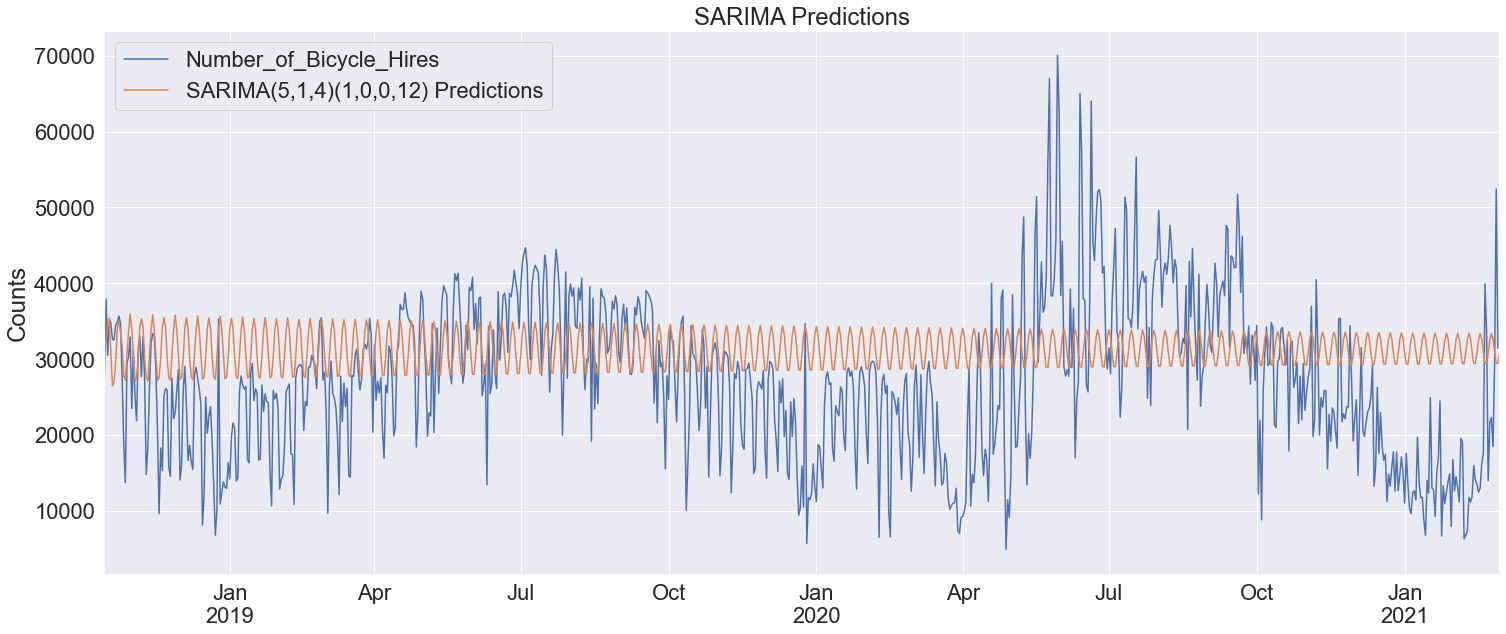

In [101]:
# Plot predictions against known values
title = 'SARIMA Predictions'
ylabel='Counts'
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
ax = test['Number_of_Bicycle_Hires'].plot(legend=True,figsize=(25,10),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

MAE: 8915.228436749108
MSE: 123952656.36507495


<IPython.core.display.Javascript object>

RMSE: 11133.402730750153


<IPython.core.display.Javascript object>

MAPE: 43.10602714354453


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

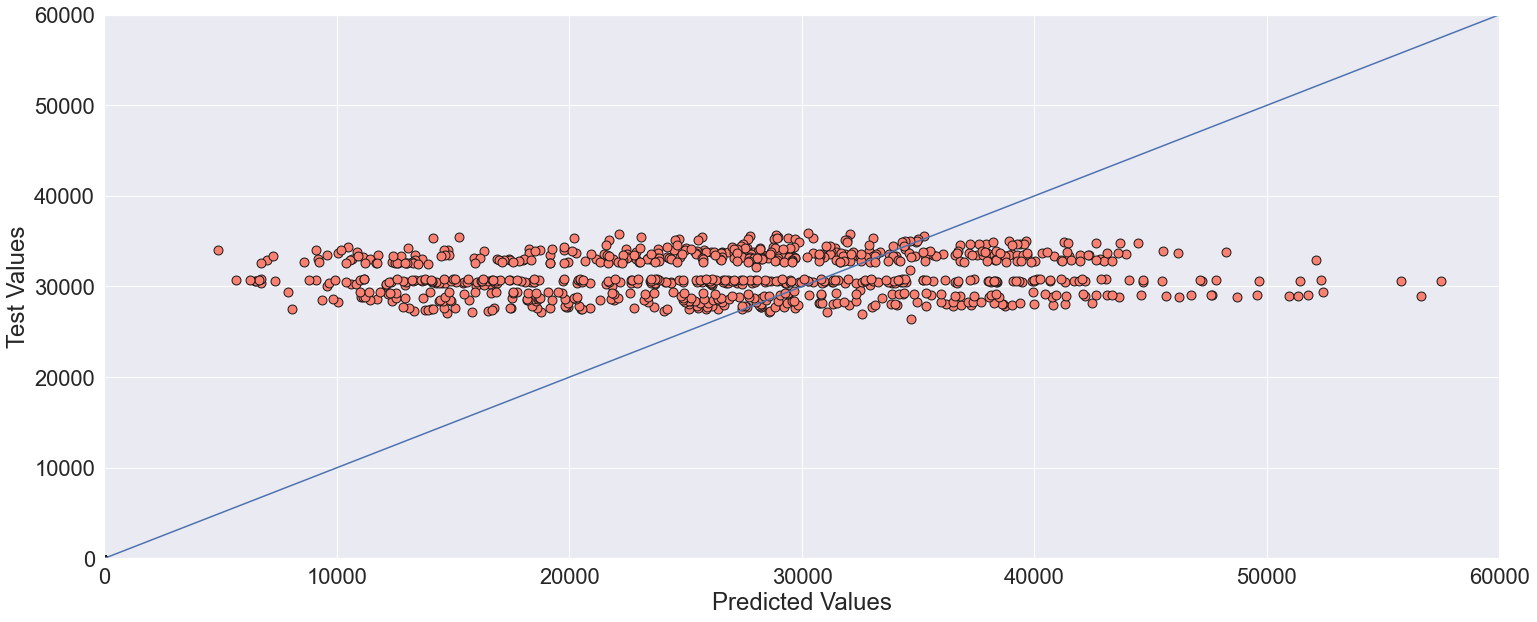

In [102]:
print('MAE:', metrics.mean_absolute_error(test_data['Number_of_Bicycle_Hires'], predictions))
print('MSE:', metrics.mean_squared_error(test_data['Number_of_Bicycle_Hires'], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_data['Number_of_Bicycle_Hires'], predictions)))
print('MAPE:', np.sqrt(metrics.mean_squared_error(test_data['Number_of_Bicycle_Hires'], predictions))/data_daily_TS['Number_of_Bicycle_Hires'].mean()*100)

plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
plt.scatter(test_data,predictions,color='salmon',edgecolor='k',s=80)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values');
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y, c='black')
plt.plot([0,60000],[0,60000])
plt.xlim(0,60000)
plt.ylim(0,60000);

End of Notebook